In [1]:
import numpy as np 
from pathlib import Path
from src import utils
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%load_ext autoreload
%autoreload 2
from matplotlib import rcParams
default_font = 15
fs_title = 16
rcParams["font.family"] = "Arial"
rcParams["savefig.dpi"] = 300
rcParams["axes.spines.top"] = False
rcParams["axes.spines.right"] = False
rcParams["axes.titlelocation"] = "left"
rcParams["axes.titleweight"] = "normal"
rcParams["font.size"] = default_font
trial_type_palette = ['tab:green', 'tab:red', 'tab:cyan', 'tab:orange'] #rew #nrew #rew_test #nrew_test #GI
from IPython.display import clear_output

# lets grab the coding directions splitted by lick or not lick, and compute the averages per mouse

In [2]:
VG11 = []
VG11.append({'mname': 'VG11', 'datexp': '2024_10_15', 'blk':'4'})
VG11.append({'mname': 'VG11', 'datexp': '2024_10_16', 'blk':'2'})
VG11.append({'mname': 'VG11', 'datexp': '2024_10_31', 'blk':'2'})
VG11.append({'mname': 'VG11', 'datexp': '2024_11_01', 'blk':'2'})
VG11.append({'mname': 'VG11', 'datexp': '2024_11_04', 'blk':'2'})
VG11.append({'mname': 'VG11', 'datexp': '2024_11_05', 'blk':'3'})
VG11.append({'mname': 'VG11', 'datexp': '2024_11_14', 'blk':'2'})
VG11.append({'mname': 'VG11', 'datexp': '2024_11_15', 'blk':'2'})
VG14 = []
VG14.append({'mname': 'VG14', 'datexp': '2024_10_15', 'blk':'2'})
VG14.append({'mname': 'VG14', 'datexp': '2024_10_16', 'blk':'2'})
VG14.append({'mname': 'VG14', 'datexp': '2024_11_21', 'blk':'2'})
VG14.append({'mname': 'VG14', 'datexp': '2024_11_23', 'blk':'2'})
VG15 = []
VG15.append({'mname': 'VG15', 'datexp': '2024_10_15', 'blk':'3'})
VG15.append({'mname': 'VG15', 'datexp': '2024_10_16', 'blk':'2'})
VG15.append({'mname': 'VG15', 'datexp': '2024_10_31', 'blk':'2'})
VG15.append({'mname': 'VG15', 'datexp': '2024_11_01', 'blk':'3'})
all_sessions = VG11 + VG14 + VG15
all_sessions

[{'mname': 'VG11', 'datexp': '2024_10_15', 'blk': '4'},
 {'mname': 'VG11', 'datexp': '2024_10_16', 'blk': '2'},
 {'mname': 'VG11', 'datexp': '2024_10_31', 'blk': '2'},
 {'mname': 'VG11', 'datexp': '2024_11_01', 'blk': '2'},
 {'mname': 'VG11', 'datexp': '2024_11_04', 'blk': '2'},
 {'mname': 'VG11', 'datexp': '2024_11_05', 'blk': '3'},
 {'mname': 'VG11', 'datexp': '2024_11_14', 'blk': '2'},
 {'mname': 'VG11', 'datexp': '2024_11_15', 'blk': '2'},
 {'mname': 'VG14', 'datexp': '2024_10_15', 'blk': '2'},
 {'mname': 'VG14', 'datexp': '2024_10_16', 'blk': '2'},
 {'mname': 'VG14', 'datexp': '2024_11_21', 'blk': '2'},
 {'mname': 'VG14', 'datexp': '2024_11_23', 'blk': '2'},
 {'mname': 'VG15', 'datexp': '2024_10_15', 'blk': '3'},
 {'mname': 'VG15', 'datexp': '2024_10_16', 'blk': '2'},
 {'mname': 'VG15', 'datexp': '2024_10_31', 'blk': '2'},
 {'mname': 'VG15', 'datexp': '2024_11_01', 'blk': '3'}]

In [3]:
lick_response = np.load(f"../data/notz/overall/cod_dir_splitted_with_wo_licks_pertrial_0_125.npy", allow_pickle=True)
print(lick_response.shape, "session, ttype, area, cell_type, lick/nolick")

(16, 4, 4, 2, 2) session, ttype, area, cell_type, lick/nolick


In [4]:
first_training_day = np.arange(1,16,4)
last_training_day = np.arange(2,16,4)
sess_days = [first_training_day, last_training_day]
areas = ['V1', 'medial', 'lateral', 'anterior']
ctypes = ['exc', 'inh']
day_titles = ['all rewarded before training', 'first training day', 'last training day', 'all rewarded after training']

In [6]:
first_day_response = lick_response[first_training_day]
last_day_response = lick_response[last_training_day]
avgs_per_mouse_day1 = np.empty((4, 4, 4, 2, 2, 400))
avgs_per_mouse_day2 = np.empty((4, 4, 4, 2, 2, 400))
for iday, day_response in enumerate([first_day_response, last_day_response]):
    for m in range(4):
        for ttype in range(4):
            for a, area in enumerate(areas):
                for cell_type in range(2):
                    for lick in range(2):
                        if iday == 0:
                            avgs_per_mouse_day1[m, ttype, a, cell_type, lick,:] = np.mean(day_response[m, ttype, a, cell_type, lick], axis=0)
                        else:
                            avgs_per_mouse_day2[m, ttype, a, cell_type, lick,:] = np.mean(day_response[m, ttype, a, cell_type, lick], axis=0)

# plot last day correct vs last day incorrect trials 

## excitatory neurons

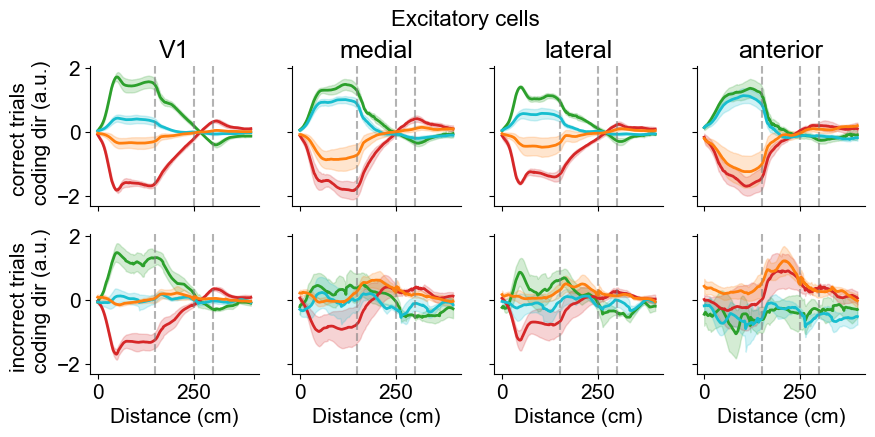

In [9]:
from scipy.stats import sem
last_sess_mean = np.mean(avgs_per_mouse_day2, axis=0)
last_sess_se = sem(avgs_per_mouse_day2, axis=0)
fig, ax = plt.subplots(2, 4, figsize=(10, 4), sharex=True, sharey=True)
fig.suptitle('Excitatory cells', fontsize=fs_title, y=1.02)
mean_response = last_sess_mean
for ttype in range(4):
    for io, out in enumerate(["correct", "incorrect"]):
        if out == "correct":
            if ttype in [0,2]:
                lick = 0 # reward collected trials
            else:
                lick = 1 #correctly ommited trials
        else:
            if ttype in [0,2]:
                lick = 1
            else:
                lick = 0
        for a, area in enumerate(areas):
            ax[io, a].plot(mean_response[ttype, a, 0, lick], color=trial_type_palette[ttype], linewidth=2)
            ax[io, a].fill_between(np.arange(400), mean_response[ttype, a, 0, lick] - last_sess_se[ttype, a, 0, lick], 
                                   mean_response[ttype, a, 0, lick] + last_sess_se[ttype, a, 0, lick], alpha=0.2, color=trial_type_palette[ttype])
            ax[io, a].axvline(x=150, color='gray', linestyle='--', alpha=0.2)
            ax[io, a].axvline(x=250, color='gray', linestyle='--', alpha=0.2)
            ax[io, a].axvline(x=300, color='gray', linestyle='--', alpha=0.2)
            if io == 0:
                ax[io, a].set_xlabel('')
                ax[io, a].set_title(f"{areas[a]}", loc='center')
                if a == 0:
                    ax[io, a].set_ylabel('correct trials \n coding dir (a.u.)')
            else:
                ax[io, a].set_xlabel('Distance (cm)')
                if a == 0:
                    ax[io, a].set_ylabel('incorrect trials \n coding dir (a.u.)')
        

# Inhibitory neurons

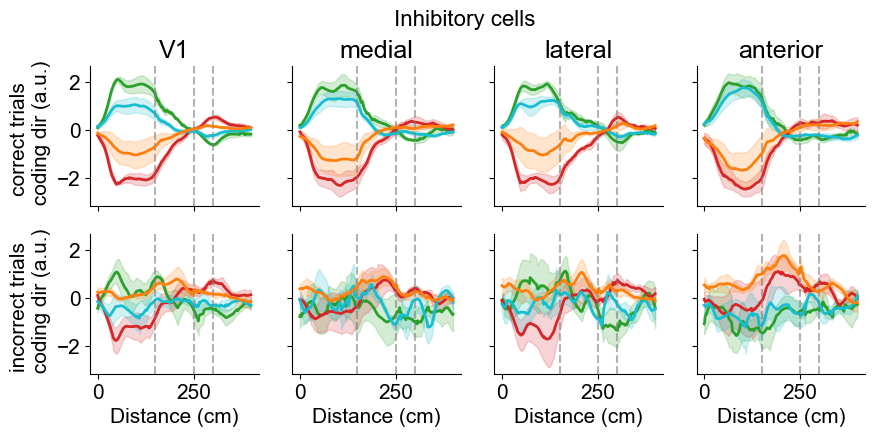

In [10]:
fig, ax = plt.subplots(2, 4, figsize=(10, 4), sharex=True, sharey=True)
fig.suptitle('Inhibitory cells', fontsize=fs_title, y=1.02)
mean_response = last_sess_mean
for ttype in range(4):
    for io, out in enumerate(["correct", "incorrect"]):
        if out == "correct":
            if ttype in [0,2]:
                lick = 0 # reward collected trials
            else:
                lick = 1 #correctly ommited trials
        else:
            if ttype in [0,2]:
                lick = 1
            else:
                lick = 0
        for a, area in enumerate(areas):
            ax[io, a].plot(mean_response[ttype, a, 1, lick], color=trial_type_palette[ttype], linewidth=2)
            ax[io, a].fill_between(np.arange(400), mean_response[ttype, a, 1, lick] - last_sess_se[ttype, a, 1, lick], 
                                   mean_response[ttype, a, 1, lick] + last_sess_se[ttype, a, 1, lick], alpha=0.2, color=trial_type_palette[ttype])
            ax[io, a].axvline(x=150, color='gray', linestyle='--', alpha=0.2)
            ax[io, a].axvline(x=250, color='gray', linestyle='--', alpha=0.2)
            ax[io, a].axvline(x=300, color='gray', linestyle='--', alpha=0.2)
            if io == 0:
                ax[io, a].set_xlabel('')
                ax[io, a].set_title(f"{areas[a]}", loc='center')
                if a == 0:
                    ax[io, a].set_ylabel('correct trials \n coding dir (a.u.)')
            else:
                ax[io, a].set_xlabel('Distance (cm)')
                if a == 0:
                    ax[io, a].set_ylabel('incorrect trials \n coding dir (a.u.)')

In [10]:
def significance(pval):
    if  pval >= .05:
        sig = ''
    elif pval < .05 and pval >= .01:
        sig = '*'
    elif pval < .01 and pval >= .001:
        sig = '**'
    elif pval < .001 and pval >= .0001:
        sig = '***'
    else:
        sig = '****'
    return sig

# lets compute the average coding dir (regardless lick or not lick) for each session and each day

In [5]:
avgs_coding_dirs = np.empty((16, 4, 4, 2, 400))
for iss, sess in enumerate(all_sessions):
    name, date, blk, = sess['mname'], sess['datexp'], sess['blk']
    pth = Path(fr"..\data\notz\{name}\{date}\{blk}\cod_dirs_0_125.npy")
    cod_dirs = np.load(pth)
    m1 = utils.load_mouse(name, date, blk, load_neurons=True, interp_behav=True, load_retinotopy=True, mdl_path=r"D:\mouseobj\notz")
    for a, _ in enumerate(areas):
        for ctype, _ in enumerate(ctypes):
            for i_t, (ttype, trials) in enumerate(m1.trial_dict.items()):
                if ttype in ['rewarded', 'non rewarded']:
                    t = trials[1::2] # only use test trials
                    avgs_coding_dirs[iss, i_t, a, ctype, :] = cod_dirs[t, a, ctype, :].mean(0)
                else:
                    avgs_coding_dirs[iss, i_t, a, ctype, :] = cod_dirs[trials, a, ctype, :].mean(0)
    clear_output(wait=True)
np.save(r"..\data\notz\overall\avgs_coding_dirs.npy", avgs_coding_dirs)
print("Done...")
print(avgs_coding_dirs.shape, "session, ttype, area, cell_type, positions")

Done...
(16, 4, 4, 2, 400) session, ttype, area, cell_type, positions


In [6]:
rew_gis = np.empty((16,4,2))
nrew_gis = np.empty((16,4,2))
for day in range(avgs_coding_dirs.shape[0]):
    cd_selection = avgs_coding_dirs[day,:,:,:,:125]
    cd_selection = cd_selection.mean(-1)
    for cell_type in range(2):
        for area in range(4):
            red_cyan = np.abs(cd_selection[1,area, cell_type] - cd_selection[2, area, cell_type])
            green_cyan = np.abs(cd_selection[0,area, cell_type] - cd_selection[2,area, cell_type])
            red_orange = np.abs(cd_selection[1,area, cell_type] - cd_selection[3, area, cell_type])
            green_orange = np.abs(cd_selection[0, area, cell_type] - cd_selection[3, area, cell_type])
            green_red  = np.abs(cd_selection[0, area, cell_type] - cd_selection[1, area, cell_type])
            rew_gis[day, area, cell_type] = (red_cyan - green_cyan) / green_red
            nrew_gis[day, area, cell_type] = (red_orange - green_orange) / green_red

In [7]:
gis = np.empty((16,4,2))
for day in range(avgs_coding_dirs.shape[0]):
    cd_selection = avgs_coding_dirs[day,:,:,:,:125]
    cd_selection = cd_selection.mean(-1)
    for cell_type in range(2):
        for area in range(4):
            cyan_orange = np.abs(cd_selection[2,area, cell_type] - cd_selection[3, area, cell_type])
            green_red = np.abs(cd_selection[0,area, cell_type] - cd_selection[1, area, cell_type])
            gis[day, area, cell_type] = cyan_orange/green_red

In [8]:
second_day = np.arange(1,16,4)
third_day = np.arange(2,16,4)
sess_days = np.concatenate(np.array([second_day, third_day]))

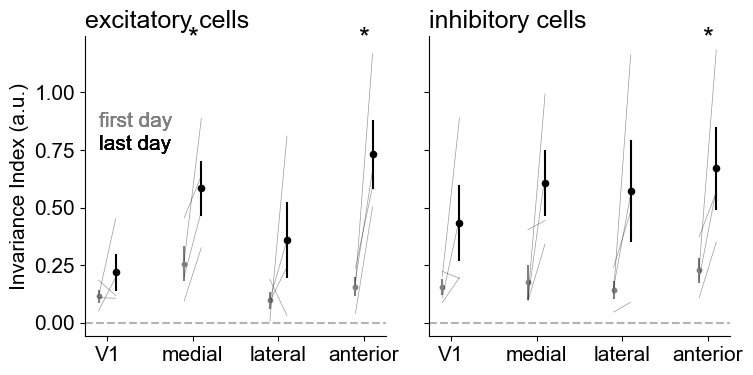

In [11]:
from scipy.stats import ttest_rel, sem
gis_sess = gis[sess_days]
fig, ax = plt.subplots(1, 2, figsize=(7.8,4), sharex=True, sharey=True)
for a in range(4):
    for ctp in range(2):
        day_one_r = gis_sess[:4,a, ctp]
        day_two_r = gis_sess[4:,a, ctp]
        mean_day_one = np.mean(day_one_r, axis=0)
        mean_day_two = np.mean(day_two_r, axis=0)
        sem_day_one = sem(day_one_r, axis=0)
        sem_day_two = sem(day_two_r, axis=0)
        ax[ctp].scatter(a-.1, mean_day_one, color='gray', alpha=1, s=10)
        ax[ctp].scatter(a+.1, mean_day_two, color='k', alpha=1, s=20)
        ax[ctp].errorbar(a-.1, mean_day_one, yerr=sem_day_one, color='gray', alpha=1)
        ax[ctp].errorbar(a+.1, mean_day_two, yerr=sem_day_two, color='k', alpha=1)
        ax[ctp].set_xticks(np.arange(4), ['V1', 'medial', 'lateral', 'anterior'])
        
        ax[ctp].axhline(y=0, color='gray', linestyle='--', alpha=0.2)
        if ctp == 0:
            ax[ctp].set_ylabel('Invariance Index (a.u.)')
            ax[ctp].set_yticks([0,.25,.5,.75, 1, 1.25])
            ax[ctp].text(-.1, .85, "first day", ha='left', color='gray')
            ax[ctp].text(-.1, .75, "last day", ha='left', color='k')
            ax[ctp].set_title("excitatory cells")
        else:
            ax[ctp].set_title("inhibitory cells")
        t, p = ttest_rel(day_two_r, day_one_r, alternative='greater')
        p_t = significance(p)
        ax[ctp].text(a, 1.2, p_t, ha='center', color='k', fontsize=20)

        # connect lines between every sample point and each day
        for m in range(4):
            ax[ctp].plot([a-.1, a+.1], [day_one_r[m], day_two_r[m]], color='k', linewidth=.5, alpha=0.4)
plt.tight_layout()
plt.savefig("../results/gis_day1_day2.svg", bbox_inches='tight')

3.346764406367745 0.022082422208262776


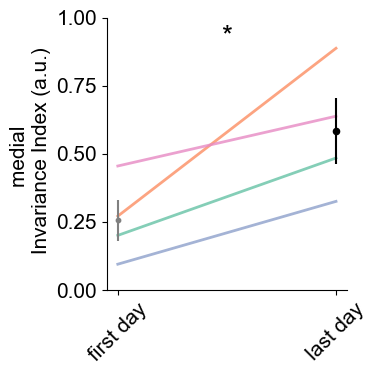

In [12]:
from scipy.stats import ttest_rel, sem
gis_sess = gis[sess_days]
fig, ax = plt.subplots(1,1, figsize=(4, 4), sharey=True)
day_one_r = gis_sess[:4, 1, 0]
day_two_r = gis_sess[4:, 1, 0]
mean_day_one = np.mean(day_one_r, axis=0)
mean_day_two = np.mean(day_two_r, axis=0)
sem_day_one = sem(day_one_r, axis=0)
sem_day_two = sem(day_two_r, axis=0)
ax.scatter(-.1, mean_day_one, color='gray', alpha=1, s=10)
ax.scatter(.1, mean_day_two, color='k', alpha=1, s=20)
ax.errorbar(-.1, mean_day_one, yerr=sem_day_one, color='gray', alpha=1)
ax.errorbar(.1, mean_day_two, yerr=sem_day_two, color='k', alpha=1)
ax.set_xticks([-.1, .1], ['first day', 'last day'], rotation=45)
ax.set_ylabel('medial \n Invariance Index (a.u.)')
ax.set_yticks([0,.25,.5,.75, 1])
ax.set_ylim(0, 1)
#ax.text(, .85, "first day", ha='left', color='gray', fontsize=12)
#ax.text(-.1, .75, "last day", ha='left', color='k', fontsize=12)
t,p = ttest_rel(day_two_r, day_one_r, alternative='greater')
p_t = significance(p)
print(t,p)
ax.text(0, .9, p_t, ha='center', color='k', fontsize=20)

# connect lines between every sample point and each day
mouse_colors = sns.color_palette("Set2", 4)
for m in range(4):
    ax.plot([-.1, +.1], [day_one_r[m], day_two_r[m]], alpha=0.8, color= mouse_colors[m], linewidth=2, zorder=0)
plt.tight_layout()
plt.savefig("../results/gis_day1_day2_medial.svg", bbox_inches='tight')

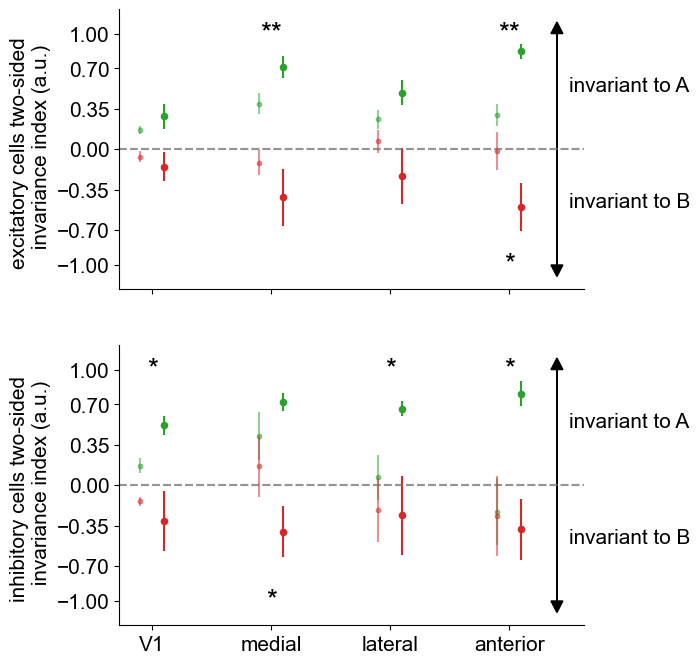

In [13]:
from scipy.stats import ttest_rel, sem
rew_gis_sess = rew_gis[sess_days]
nrew_gis_sess = nrew_gis[sess_days]
fig, ax = plt.subplots(2, 1, figsize=(6, 8), sharex=True, sharey=True)
for a in range(4):
    for i_cat, cat_response in enumerate([rew_gis_sess, nrew_gis_sess]):
        if i_cat == 0:
            c = 'tab:green'
        else:
            c = 'tab:red' 
        for ctp in range(2):
            day_one_r = cat_response[:4,a,ctp]
            day_two_r = cat_response[4:,a,ctp]
            mean_day_one = np.mean(day_one_r, axis=0)
            mean_day_two = np.mean(day_two_r, axis=0)
            sem_day_one = sem(day_one_r, axis=0)
            sem_day_two = sem(day_two_r, axis=0)
            ax[ctp].scatter(a-.1, mean_day_one, color=c, alpha=0.5, s=10)
            ax[ctp].scatter(a+.1, mean_day_two, color=c, alpha=1, s=20)
            ax[ctp].errorbar(a-.1, mean_day_one, yerr=sem_day_one, color=c, alpha=0.5)
            ax[ctp].errorbar(a+.1, mean_day_two, yerr=sem_day_two, color=c, alpha=1)
            ax[ctp].set_xticks(np.arange(4), ['V1', 'medial', 'lateral', 'anterior'])
            ax[ctp].axhline(y=0, color='gray', linestyle='--', alpha=0.2)
            if ctp == 0:
                ax[ctp].set_ylabel('excitatory cells two-sided \n invariance index (a.u.)')
                ax[ctp].set_yticks([-1,-.7,-.35,0,.35,.7,1])
            else:
                ax[ctp].set_ylabel('inhibitory cells two-sided \n invariance index (a.u.)')
            if i_cat == 0:
                t, p = ttest_rel(day_two_r, day_one_r, alternative='greater')
            else:
                t, p = ttest_rel(day_two_r, day_one_r, alternative='less')
            p_t = significance(p)
            if i_cat == 0:
                ax[ctp].text(a, 1, p_t, ha='center', va='center', color='k', fontsize=20)
            else:
                ax[ctp].text(a, -1, p_t, ha='center', va='center', color='k', fontsize=20)
                # add a green arrow from 0 to 1 with a text "generalizes to rewarded"
                # add a red arrow from 0 to -1 with a text "generalizes to non-rewarded"
                # add a gray arrow from 0 to 0 with a text "no generalization"

# add arrows
for ctp in range(2):
    ax[ctp].arrow(3.4, 0, 0, 1, color='k', head_width=0.1, head_length=0.1)
    ax[ctp].text(3.5, .5, "invariant to A", color='k')
    ax[ctp].arrow(3.4, 0, 0, -1, color='k', head_width=0.1, head_length=0.1)
    ax[ctp].text(3.5, -.5, "invariant to B", color='k')
        

# First vs last day coding direction

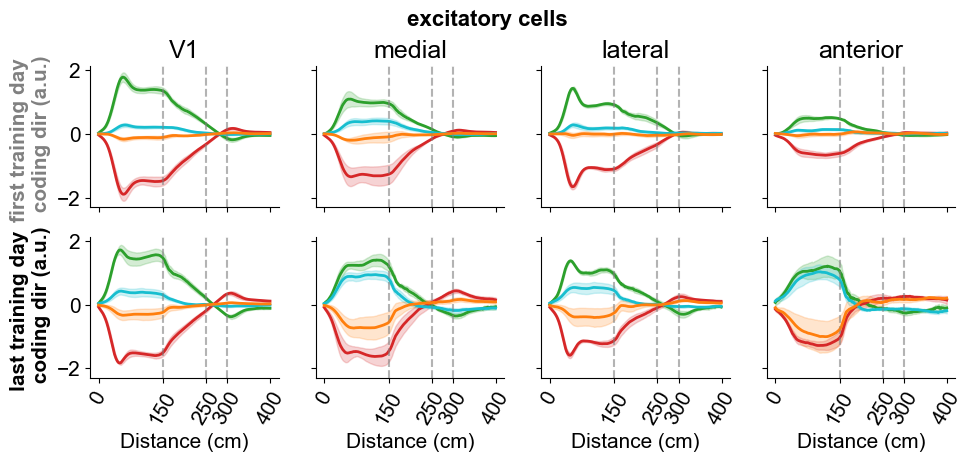

In [64]:
first_sess_mean = np.mean(avgs_coding_dirs[second_day], axis=0)
last_sess_mean = np.mean(avgs_coding_dirs[third_day], axis=0)
fig, ax = plt.subplots(2, 4, figsize=(10, 5), sharex=True, sharey=True)
fig.suptitle("excitatory cells", fontsize=fs_title, fontweight='bold', y=.93, ha='center')
for iday, day_response in enumerate([avgs_coding_dirs[second_day], avgs_coding_dirs[third_day]]):
    if iday == 0:
        mean_response = first_sess_mean
        day_response = avgs_coding_dirs[second_day]
    else:
        mean_response = last_sess_mean
        day_response = avgs_coding_dirs[third_day]
    for ttype in range(4):
        for a, area in enumerate(areas):
            ax[iday, a].plot(mean_response[ttype, a, 0], color=trial_type_palette[ttype], linewidth=2)
            ax[iday, a].fill_between(np.arange(400), mean_response[ttype, a, 0] - sem(day_response[:,ttype, a, 0], axis=0),
                                      mean_response[ttype, a, 0] + sem(day_response[:,ttype, a, 0], axis=0), 
                                     color=trial_type_palette[ttype], alpha=0.2)
            ax[iday, a].axvline(x=150, color='gray', linestyle='--', alpha=0.2)
            ax[iday, a].axvline(x=250, color='gray', linestyle='--', alpha=0.2)
            ax[iday, a].axvline(x=300, color='gray', linestyle='--', alpha=0.2)
            if iday == 0:
                ax[iday, a].set_xlabel('')
                ax[iday, a].set_title(f"{areas[a]}", loc='center')
                if a == 0:
                    ax[iday, a].set_ylabel('first training day \n coding dir (a.u.)', color='gray', fontweight='bold')
            else:
                ax[iday, a].set_xlabel('Distance (cm)')
                ax[iday, a].set_xticks([0, 150, 250, 300, 400])
                #rotate xticks
                for tick in ax[iday, a].get_xticklabels():
                    tick.set_rotation(60)
                if a == 0:
                    ax[iday, a].set_ylabel('last training day \n coding dir (a.u.)', color='k', fontweight='bold')
plt.tight_layout()
plt.savefig("../results/coding_dirs_area_firstvslast.svg", bbox_inches='tight')

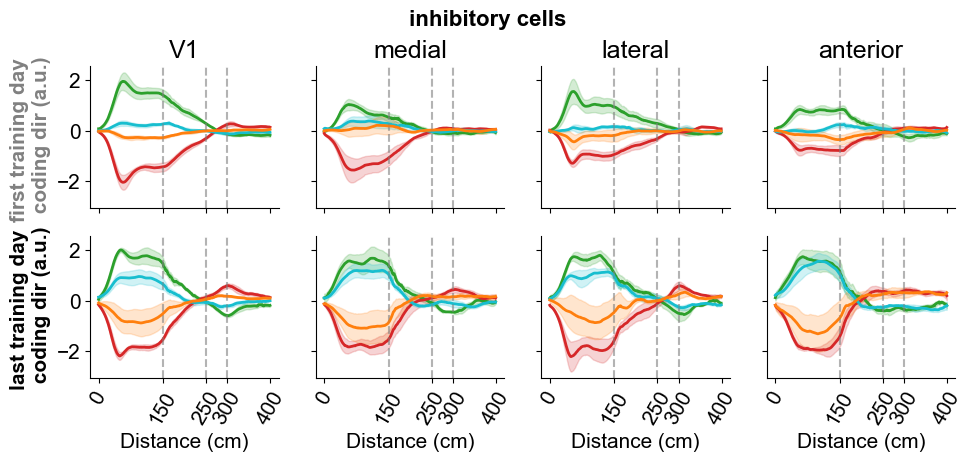

In [65]:
first_sess_mean = np.mean(avgs_coding_dirs[second_day], axis=0)
last_sess_mean = np.mean(avgs_coding_dirs[third_day], axis=0)
fig, ax = plt.subplots(2, 4, figsize=(10, 5), sharex=True, sharey=True)
fig.suptitle("inhibitory cells", fontsize=fs_title, fontweight='bold', y=.93, ha='center')
for iday, day_response in enumerate([avgs_coding_dirs[second_day], avgs_coding_dirs[third_day]]):
    if iday == 0:
        mean_response = first_sess_mean
        day_response = avgs_coding_dirs[second_day]
    else:
        mean_response = last_sess_mean
        day_response = avgs_coding_dirs[third_day]
    for ttype in range(4):
        for a, area in enumerate(areas):
            ax[iday, a].plot(mean_response[ttype, a, 1], color=trial_type_palette[ttype], linewidth=2)
            ax[iday, a].fill_between(np.arange(400), mean_response[ttype, a, 1] - sem(day_response[:,ttype, a, 1], axis=0),
                                      mean_response[ttype, a, 1] + sem(day_response[:,ttype, a, 1], axis=0), 
                                     color=trial_type_palette[ttype], alpha=0.2)
            ax[iday, a].axvline(x=150, color='gray', linestyle='--', alpha=0.2)
            ax[iday, a].axvline(x=250, color='gray', linestyle='--', alpha=0.2)
            ax[iday, a].axvline(x=300, color='gray', linestyle='--', alpha=0.2)
            if iday == 0:
                ax[iday, a].set_xlabel('')
                ax[iday, a].set_title(f"{areas[a]}", loc='center')
                if a == 0:
                    ax[iday, a].set_ylabel('first training day \n coding dir (a.u.)', color='gray', fontweight='bold')
            else:
                ax[iday, a].set_xlabel('Distance (cm)')
                ax[iday, a].set_xticks([0, 150, 250, 300, 400])
                #rotate xticks
                for tick in ax[iday, a].get_xticklabels():
                    tick.set_rotation(60)
                if a == 0:
                    ax[iday, a].set_ylabel('last training day \n coding dir (a.u.)', color='k', fontweight='bold')
plt.tight_layout()

| Interneuron Type | Key Functions | Role in Reward Encoding | Role in Predictive Coding | Role in Top-Down Modulation | Role in Plasticity | Key References |
|------------------|---------------|--------------------------|----------------------------|------------------------------|--------------------|----------------|
| **VIP** (Vasoactive Intestinal Peptide) | Disinhibition via SST suppression; broadcasts contextual signals | Strong, global response to reward and punishment; task-independent activation | Amplifies prediction errors by inhibiting SST and disinhibiting PYR; responds to unexpected omissions | Driven by ACC input to enhance deviance detection; integrates surprise and context | Indirectly modulates plasticity via SST/PV balance and disinhibition | [1], [2], [3], [7] |
| **SST** (Somatostatin) | Dendrite-targeting inhibition; stimulus-specific suppression | Encodes reward timing via sustained ramping activity | Adapts to repeated stimuli; disinhibited to allow prediction error amplification | Activated by OFC input to suppress irrelevant stimuli; filters redundant inputs | Enhancing SST restores plasticity in adult V1; mediates critical period dynamics | [2], [3], [5], [6] |
| **PV** (Parvalbumin) | Fast, perisomatic inhibition; controls gain and timing | Encodes precise timing of expected reward; ramping activity | Modulates gain; less directly involved in prediction errors | Suppressed by OFC input during learning to reduce inhibition on pyramidal cells | Downregulation permits plasticity reopening; key to critical period closure | [5], [6] |

### References
1. Millman et al., 2020 – VIP interneurons encode reinforcement signals broadly across cortex  
2. Zhang et al., 2014 – ACC–V1 projections drive VIP→SST disinhibition in deviance detection  
3. Furutachi et al., 2023 – VIP–SST gating of pulvinar inputs during prediction error in V1  
4. Hamm et al., 2021 – VIP activity mediates contextual modulation and top-down feedback  
5. Liu et al., 2023 – OFC input modulates SST/PV/VIP balance to guide learning  
6. Sadahiro et al., 2020 – SST activation restores plasticity in adult V1; PV/SST balance critical  
7. Musall et al., 2021 – Unexpected omissions activate VIP and excitatory cells across visual cortex  

# lets look at the coding direction first vs last day of one mouse, and see if there is a difference between correct and incorrect trials

In [15]:
ex_mouse = []
ex_mouse.append({'mname': 'VG15', 'datexp': '2024_10_16', 'blk':'2'})
ex_mouse.append({'mname': 'VG15', 'datexp': '2024_10_31', 'blk':'2'})
mice = []
for iss, sess in enumerate(ex_mouse):
    name, date, blk = sess['mname'], sess['datexp'], sess['blk']
    m = utils.load_mouse(name, date, blk, load_neurons=True, interp_behav=True, load_retinotopy=True, mdl_path=r"D:\mouseobj\notz")
    mice.append(m)
    clear_output(wait=True)
print("Sessions loaded")

Sessions loaded


In [436]:
def build_correct_dicts(m, lick_window=(150,250), onlytest=False):
    """
    Build dictionaries of correct and incorrect trials for each trial type.
    """
    correct_dict = {}
    incorrect_dict = {}
    for ttype in ["rewarded", "non rewarded", "rewarded test", "non rewarded test"]:
        t_licks, t_nolicks = utils.get_trials_with_licks(m, lick_window=lick_window, trialtype=ttype, onlytest=onlytest)
        if ttype in ["rewarded", "rewarded test"]:
            correct_dict[ttype] = t_licks
            incorrect_dict[ttype] = t_nolicks
        if ttype in ["non rewarded", "non rewarded test"]:
            correct_dict[ttype] = t_nolicks
            incorrect_dict[ttype] = t_licks
    return correct_dict, incorrect_dict

def select_neurons(m1, area: str, celltype:str, dprime = None, dptsh=95):
    ia = utils.get_region_idx(m1.iarea, area)
    assert celltype in ['exc', 'inh'], "celltype must be either 'exc' or 'inh'"
    selected_type = np.logical_not(m1.isred[:,0]).astype(bool) if celltype == 'exc' else m1.isred[:,0].astype(bool)
    if dprime is None:
        pstv_tsh, ngtv_tsh = utils.get_dp_thresholds(m1.train_dp[ia*selected_type], tsh=dptsh) #tresh based on the area
    else:
        pstv_tsh, ngtv_tsh = utils.get_dp_thresholds(dprime[ia*selected_type], tsh=dptsh)
    prefer_r = (m1.train_dp>=pstv_tsh)
    prefer_nr = (m1.train_dp<=ngtv_tsh)
    area_prefer_r = prefer_r * ia * selected_type
    area_prefer_nr = prefer_nr * ia * selected_type
    return area_prefer_r, area_prefer_nr, selected_type, ia

In [17]:
def plot_scatter_selective_pops(mice, area, typ_cell, ellipse=False):
    from matplotlib.patches import Ellipse
    fig, ax = plt.subplots(1, 2, figsize=(7, 7), sharex=True, sharey=True)
    titles = ["first training day", "last training day"]
    trial_colors = ['tab:green', 'tab:red', 'tab:cyan', 'tab:orange']
    markers = ["o", "x"]
    sizes = [10, 20]
    
    def add_ellipse(ax, x, y, color):
        """Add an ellipse to the plot based on the covariance of the data."""
        if len(x) > 1 and len(y) > 1:  # Ensure there are enough points to compute covariance
            cov = np.cov(x, y)
            lambda_, v = np.linalg.eig(cov)
            lambda_ = np.sqrt(lambda_)
            ell = Ellipse(xy=(np.mean(x), np.mean(y)),
                          width=lambda_[0]*2, height=lambda_[1]*2,
                          angle=np.rad2deg(np.arccos(v[0, 0])),
                          edgecolor=color, facecolor='none', linewidth=1.5, alpha=0.7)
            ax.add_patch(ell)

    for im, m1 in enumerate(mice):
        area_prefer_r, area_prefer_nr, _, _ = select_neurons(m1, area, typ_cell)
        A_pop = m1.interp_spks[area_prefer_r, :].mean(0)
        B_pop = m1.interp_spks[area_prefer_nr, :].mean(0)
        A_pop = A_pop[:, :125].mean(1)
        B_pop = B_pop[:, :125].mean(1)
        # Construct trials
        correct_dict, incorrect_dict = build_correct_dicts(m1, lick_window=(150,250), onlytest=True)
        test_Aprototype_C = np.intersect1d(m1.trial_dict['rewarded'][1::2], correct_dict["rewarded"])
        test_Bprototype_C = np.intersect1d(m1.trial_dict['non rewarded'][1::2], correct_dict["non rewarded"])
        test_Aprototype_I = np.intersect1d(m1.trial_dict['rewarded'][1::2], incorrect_dict["rewarded"])
        test_Bprototype_I = np.intersect1d(m1.trial_dict['non rewarded'][1::2], incorrect_dict["non rewarded"])
        rest_A_C = np.intersect1d(m1.trial_dict["rewarded test"], correct_dict["rewarded test"])
        rest_B_C = np.intersect1d(m1.trial_dict["non rewarded test"], correct_dict["non rewarded test"])
        rest_A_I = np.intersect1d(m1.trial_dict["rewarded test"], incorrect_dict["rewarded test"])
        rest_B_I = np.intersect1d(m1.trial_dict["non rewarded test"], incorrect_dict["non rewarded test"])
        Incorrect_trials = [test_Aprototype_I, test_Bprototype_I, rest_A_I, rest_B_I]
        Correct_trials = [test_Aprototype_C, test_Bprototype_C, rest_A_C, rest_B_C]
        
        for ic, trials in enumerate([Correct_trials, Incorrect_trials]):
            for isb, subtype in enumerate(trials):
                ax[im].scatter(A_pop[subtype], B_pop[subtype], color=trial_colors[isb], marker=markers[ic], alpha=0.3, s=sizes[ic])
                # Add ellipses for each class
                if ellipse:
                    add_ellipse(ax[im], A_pop[subtype], B_pop[subtype], trial_colors[isb])
        
        for ic, trials in enumerate([Correct_trials, Incorrect_trials]):
            for isb, subtype in enumerate(trials):
                ax[im].scatter(A_pop[subtype].mean(0), B_pop[subtype].mean(0), color=trial_colors[isb], marker=markers[ic], s=30)
        ax[im].axis('square')
        ax[im].set_title(titles[im], fontsize=fs_title, fontweight='bold')
        ax[im].set_xlabel(f"A preferring pop. FR (Hz)", fontsize=default_font)
    ax[0].set_ylabel(f"B preferring pop. FR (Hz)", fontsize=default_font)
    fig.suptitle(f"{area}", fontsize=fs_title, fontweight='bold', y=.75, ha='center')

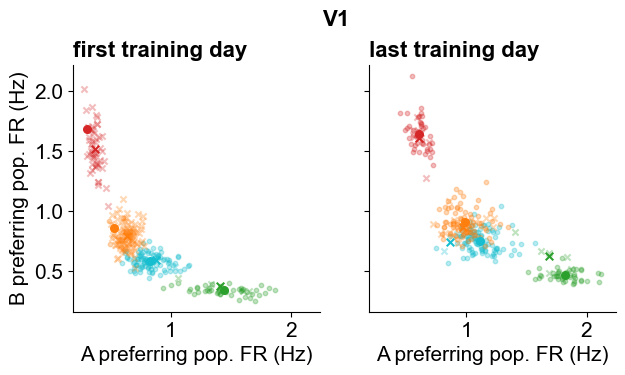

In [67]:
plot_scatter_selective_pops(mice, "V1", "exc")

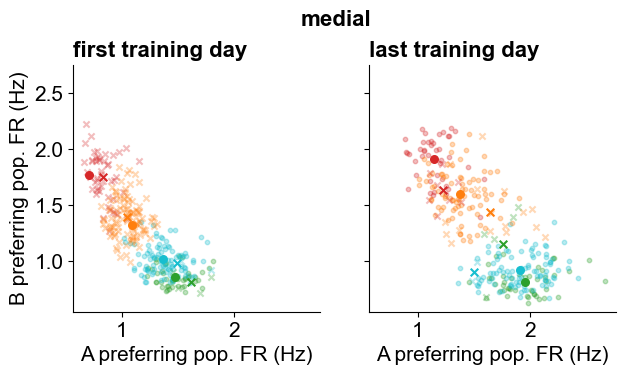

In [68]:
plot_scatter_selective_pops(mice, "medial", "exc")

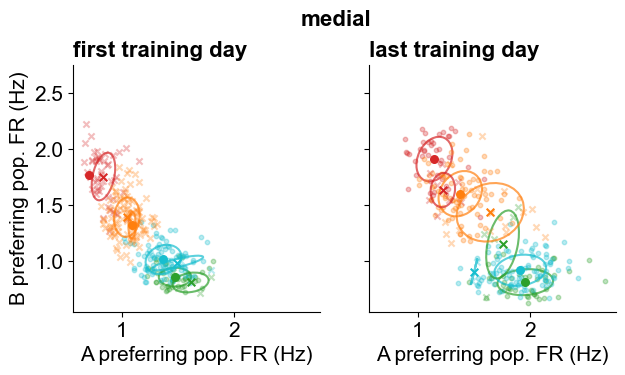

In [69]:
plot_scatter_selective_pops(mice, "medial", "exc", ellipse=True)

# Behavioral covariates control

In [145]:
VG11 = []
VG11.append({'mname': 'VG11', 'datexp': '2024_10_31', 'blk':'2'})
VG11.append({'mname': 'VG11', 'datexp': '2024_11_14', 'blk':'2'})
VG14 = []
VG14.append({'mname': 'VG14', 'datexp': '2024_11_21', 'blk':'2'})
VG15 = []
VG15.append({'mname': 'VG15', 'datexp': '2024_10_31', 'blk':'2'})
behav_sess = VG11 + VG14 + VG15

### behavioral covariates separated by ttype and lick

In [152]:
avg_pupil_ttype_lick = np.empty((len(behav_sess), 4, 2, 400)) # animals, trial types, lick/no lick, 400 positions
avg_motion_ttype_lick = np.empty((len(behav_sess), 4, 2, 400)) # animals, trial types, lick/no lick, 400 positions
avg_arrays = [avg_pupil_ttype_lick, avg_motion_ttype_lick]
for iss, sess in enumerate(behav_sess):
    name = sess['mname']
    date = sess['datexp']
    blk = sess['blk']
    m1 = utils.load_mouse(name, date, blk, load_neurons=True, interp_behav=True, load_retinotopy=True, mdl_path=r"D:\mouseobj")
    motion = np.load(f"../data/{name}/{date}/{blk}/motion_energy_corridor.npy")
    pupil = np.load(f"../data/{name}/{date}/{blk}/pupil_area_corridor.npy")
    delta_motion = ((np.expand_dims(motion[:,0],axis=1) - motion) / (np.expand_dims(motion[:,0],axis=1))) * 100
    delta_pupil = ((np.expand_dims(pupil[:,0],axis=1) - pupil) / (np.expand_dims(pupil[:,0],axis=1))) * 100
    features = [delta_motion, delta_pupil]
    for it, (ttype, trials) in enumerate(m1.trial_dict.items()):
        t_licks, t_no_licks = utils.get_trials_with_licks(m1, lick_window=(150,250), trialtype=ttype)
        for i_f, feature in enumerate(features):
            feature_licks = np.mean(feature[t_licks], axis=0)
            feature_no_licks = np.mean(feature[t_no_licks], axis=0)
            avg_arrays[i_f][iss, it, 0] = feature_licks
            avg_arrays[i_f][iss, it, 1] = feature_no_licks
    clear_output(wait=True)
np.save("../data/overall/avg_pupil_ttype_lick.npy", avg_pupil_ttype_lick)
np.save("../data/overall/avg_motion_ttype_lick.npy", avg_motion_ttype_lick)
print("Done...")

Done...


### behavioral covariates separated by category only

In [262]:
avg_pupil_cat = np.empty((len(behav_sess), 2, 400)) # animals, trial types, lick/no lick, 400 positions
avg_motion_cat= np.empty((len(behav_sess), 2, 400)) # animals, trial types, lick/no lick, 400 positions
avg_speed_cat = np.empty((len(behav_sess), 2, 400)) # animals, trial types, lick/no lick, 400 positions
avg_lrate_cat = np.empty((len(behav_sess), 2, 400)) # animals, trial types, lick/no lick, 400 positions
avg_arrays = [avg_pupil_cat, avg_motion_cat, avg_speed_cat, avg_lrate_cat]
for iss, sess in enumerate(behav_sess):
    name = sess['mname']
    date = sess['datexp']
    blk = sess['blk']
    m1 = utils.load_mouse(name, date, blk, load_neurons=True, interp_behav=True, load_retinotopy=True, mdl_path=r"D:\mouseobj")
    motion = np.load(f"../data/{name}/{date}/{blk}/motion_energy_corridor.npy")
    pupil = np.load(f"../data/{name}/{date}/{blk}/pupil_area_corridor.npy")
    speed = np.load(f"../data/{name}/{date}/{blk}/speed_interp.npy")
    lrate = np.load(f"../data/notz/{name}/{date}/{blk}/lick_rate.npy")
    delta_motion = ((np.expand_dims(motion[:,0],axis=1) - motion) / (np.expand_dims(motion[:,0],axis=1))) * 100
    delta_pupil = ((np.expand_dims(pupil[:,0],axis=1) - pupil) / (np.expand_dims(pupil[:,0],axis=1))) * 100
    features = [delta_motion, delta_pupil, speed, lrate]
    cat_A = np.concatenate([m1.trial_dict['rewarded'], m1.trial_dict['rewarded test']])
    cat_B = np.concatenate([m1.trial_dict['non rewarded'], m1.trial_dict['non rewarded test']])
    trial_cats = [cat_A, cat_B]
    for i_f, feature in enumerate(features):
        for it, trials in enumerate(trial_cats):
            feature_mean = np.mean(feature[trials], axis=0)
            avg_arrays[i_f][iss, it] = feature_mean
    clear_output(wait=True)
np.save("../data/overall/avg_pupil_cat.npy", avg_arrays[0])
np.save("../data/overall/avg_motion_cat.npy", avg_arrays[1])
np.save("../data/overall/avg_speed_cat.npy", avg_arrays[2])
np.save("../data/overall/avg_lrate_cat.npy", avg_arrays[3])
print("Done...")

Done...


### behavioral covariates separated by category and correctness

In [255]:
avg_pupil_cat_lick = np.empty((len(behav_sess), 2, 2, 400)) # animals, trial types, lick/no lick, 400 positions
avg_motion_cat_lick = np.empty((len(behav_sess), 2, 2, 400)) # animals, trial types, lick/no lick, 400 positions
avg_speed_cat_lick = np.empty((len(behav_sess), 2, 2, 400)) # animals, trial types, lick/no lick, 400 positions
avg_lrate_cat_lick = np.empty((len(behav_sess), 2, 2, 400)) # animals, trial types, lick/no lick, 400 positions
avg_arrays = [avg_pupil_cat_lick, avg_motion_cat_lick, avg_speed_cat_lick, avg_lrate_cat_lick]
for iss, sess in enumerate(behav_sess):
    name = sess['mname']
    date = sess['datexp']
    blk = sess['blk']
    m1 = utils.load_mouse(name, date, blk, load_neurons=True, interp_behav=True, load_retinotopy=True, mdl_path=r"D:\mouseobj")
    motion = np.load(f"../data/{name}/{date}/{blk}/motion_energy_corridor.npy")
    pupil = np.load(f"../data/{name}/{date}/{blk}/pupil_area_corridor.npy")
    speed = np.load(f"../data/{name}/{date}/{blk}/speed_interp.npy")
    lrate = np.load(f"../data/notz/{name}/{date}/{blk}/lick_rate.npy")
    delta_motion = ((np.expand_dims(motion[:,0],axis=1) - motion) / (np.expand_dims(motion[:,0],axis=1))) * 100
    delta_pupil = ((np.expand_dims(pupil[:,0],axis=1) - pupil) / (np.expand_dims(pupil[:,0],axis=1))) * 100
    features = [delta_motion, delta_pupil, speed, lrate]
    correct_dict, incorrect_dict = build_correct_dicts(m1, lick_window=(150,250), onlytest=False) 
    correct_A = np.concatenate([correct_dict["rewarded"], correct_dict["rewarded test"]])
    correct_B = np.concatenate([correct_dict["non rewarded"], correct_dict["non rewarded test"]])
    incorrect_A = np.concatenate([incorrect_dict["rewarded"], incorrect_dict["rewarded test"]])
    incorrect_B = np.concatenate([incorrect_dict["non rewarded"], incorrect_dict["non rewarded test"]])
    correct_trials = [correct_A, correct_B]
    incorrect_trials = [incorrect_A, incorrect_B]
    for i in range(2):
        for i_f, feature in enumerate(features):
            feature_c = np.mean(feature[correct_trials[i]], axis=0)
            feature_inc = np.mean(feature[incorrect_trials[i]], axis=0)
            avg_arrays[i_f][iss, i, 0] = feature_c
            avg_arrays[i_f][iss, i, 1] = feature_inc
    clear_output(wait=True)
np.save("../data/overall/avg_pupil_cat_lick.npy", avg_arrays[0])
np.save("../data/overall/avg_motion_cat_lick.npy", avg_arrays[1])
np.save("../data/overall/avg_speed_cat_lick.npy", avg_arrays[2])
np.save("../data/overall/avg_lrate_cat_lick.npy", avg_arrays[3])
print("Done...")

Done...


In [252]:
from scipy.stats import sem 
def plot_behav_cov(behav_cov, ylabel, figsize=(8, 4)):
    cat_a = behav_cov[:,0]
    cat_b = behav_cov[:,1]
    fig, ax = plt.subplots(1,2, figsize=figsize, sharex=True, sharey=True)
    labels = ["correct", "incorrect"]
    colors = ['tab:green', 'tab:red']
    style = ['-', ':']
    means = [cat_a.mean(axis=0), cat_b.mean(axis=0)]
    sems = [sem(cat_a, axis=0), sem(cat_b, axis=0)]
    for cat in range(2):
        mean = means[cat]
        sem_ = sems[cat]
        for i in range(2): #correct and incorrect
            ax[cat].plot(mean[i], color=colors[cat], label=labels[i], linestyle=style[i])
            ax[cat].fill_between(np.arange(400), mean[i]-sem_[i], mean[i]+sem_[i], alpha=0.3, color=colors[cat])
    ax[0].set_ylabel(ylabel)
    categories = ["Rewarded Category", "Non-rewarded Category"]
    for i in range(2):
        ax[i].legend(bbox_to_anchor=(.8, -.2), fontsize=default_font, frameon=False)
        ax[i].set_xlabel("Position (cm)")
        ax[i].set_title(categories[i])
        ax[i].axvline(150, color='k', linestyle='--', alpha=0.5)
        ax[i].axvline(250, color='k', linestyle='--', alpha=0.5)
        ax[i].axvline(300, color='k', linestyle='--', alpha=0.5)

def plot_catvsbehav(behav_cov, ylabel, ax, legend=False):
    cat_a = behav_cov[:,0]
    cat_b = behav_cov[:,1]
    ax.plot(cat_a.mean(0), color='tab:green', linestyle='-', label='Category A')
    ax.fill_between(np.arange(400), cat_a.mean(0)-sem(cat_a, axis=0), cat_a.mean(0)+sem(cat_a, axis=0), alpha=0.3, color='tab:green')
    ax.plot(cat_b.mean(0), color='tab:red', linestyle='-', label='Category B')
    ax.fill_between(np.arange(400), cat_b.mean(0)-sem(cat_b, axis=0), cat_b.mean(0)+sem(cat_b, axis=0), alpha=0.3, color='tab:red')
    ax.set_ylabel(ylabel)
    ax.set_xticks([0, 150, 250, 300, 400], ['0', '150', '250', '300', '400'], rotation=45)    
    for i in range(2):
        if legend:
            ax.legend(bbox_to_anchor=(1.05, .9), fontsize=default_font, frameon=False)
        ax.set_xlabel("Position (cm)")
        ax.axvline(150, color='k', linestyle='--', alpha=0.5)
        ax.axvline(250, color='k', linestyle='--', alpha=0.5)
        ax.axvline(300, color='k', linestyle='--', alpha=0.5)

Lets see if the behavioral covariates are different between categories overall

In [265]:
speed_cat = np.load("../data/overall/avg_speed_cat.npy")
pupil_cat = np.load("../data/overall/avg_pupil_cat.npy")
motion_cat = np.load("../data/overall/avg_motion_cat.npy")
lrate_cat = np.load("../data/overall/avg_lrate_cat.npy")

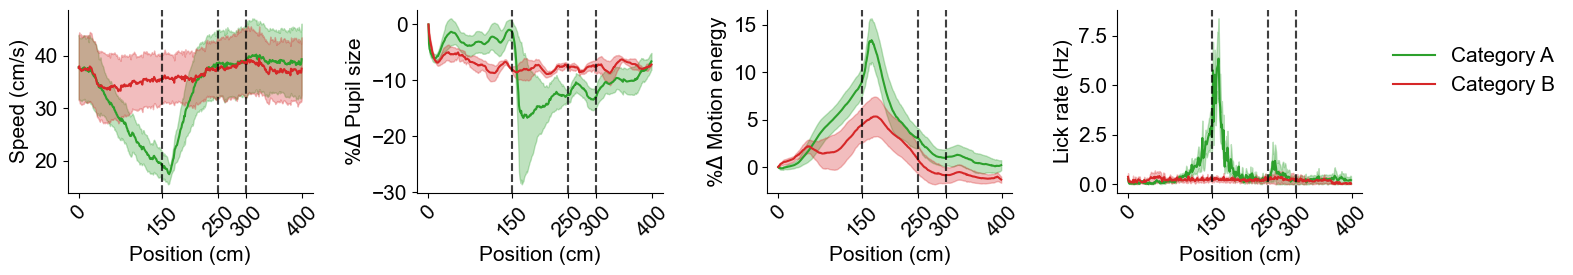

In [267]:
fig, ax = plt.subplots(1, 4, figsize=(16, 3))
plot_catvsbehav(speed_cat, "Speed (cm/s)", ax=ax[0])
plot_catvsbehav(pupil_cat, "%$\Delta$ Pupil size", ax=ax[1])
plot_catvsbehav(motion_cat, "%$\Delta$ Motion energy", ax=ax[2])
plot_catvsbehav(lrate_cat, "Lick rate (Hz)", ax=ax[3], legend=True)
plt.tight_layout()

### Cognitive State Indicators from Pupil Size and Facial Motion Energy in Mice

| **Cognitive Component** | **Pupil Size** | **Facial Motion Energy** | **Key References** |
|--------------------------|----------------|---------------------------|--------------------|
| **Decision Making**      | Dilates during deliberation and just before choice; larger with uncertainty | Increases during decision execution and motor preparation | Murphy et al., 2014 (PNAS); Musall et al., 2019 (Nat Neurosci); Reimer et al., 2014 (J Neurosci) |
| **Engagement**           | Higher baseline when engaged; constricts with disengagement | Low but sustained motion during engagement; drops with disengagement or rises during unrelated grooming | McGinley et al., 2015 (Science); Stringer et al., 2019 (Nature); Salkoff et al., 2020 (eLife) |
| **Attention**            | Transient dilation to salient or expected stimuli | Small increases in motion (e.g., whisker, snout) when anticipating or detecting stimuli | Reimer et al., 2016 (Neuron); Steinmetz et al., 2019 (Nature) |

# Now lets split the data into correct and incorrect trials

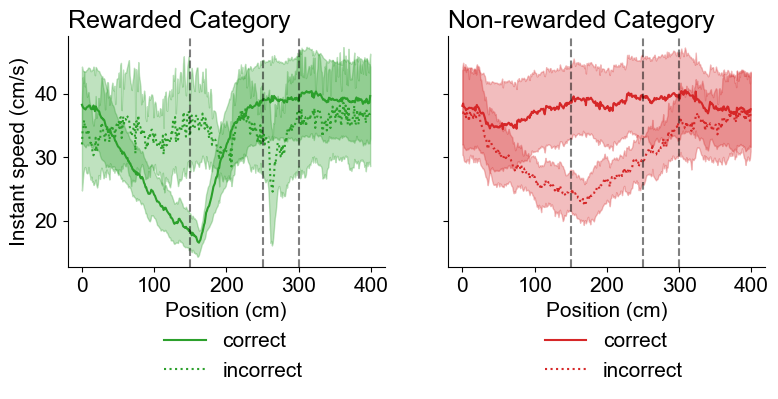

In [249]:
avg_speed_ttype_andlick = np.load("../data/overall/avg_speed_cat_lick.npy")
plot_behav_cov(avg_speed_ttype_andlick, "Instant speed (cm/s)", figsize=(9, 3))

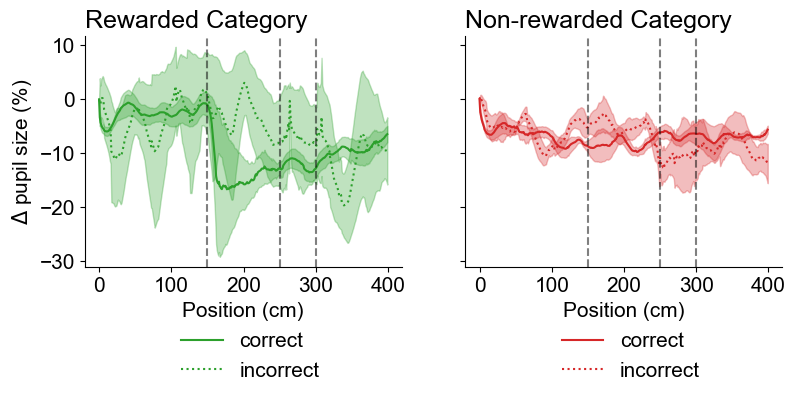

In [250]:
avg_pupil_ttype_lick = np.load("../data/overall/avg_pupil_cat_lick.npy")
plot_behav_cov(avg_pupil_ttype_lick, "$\Delta$ pupil size (%)", figsize=(9, 3))

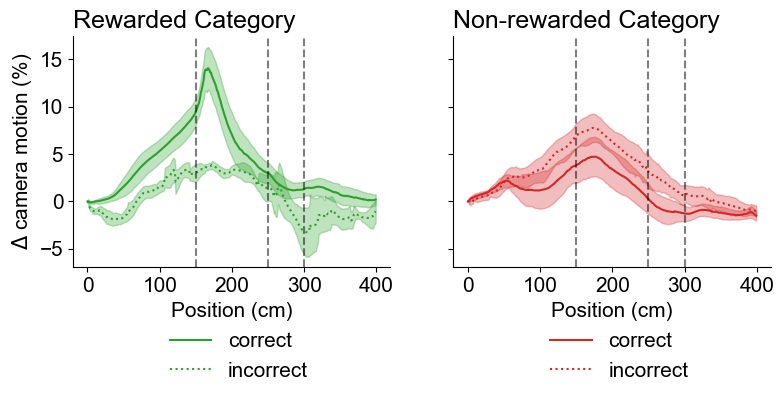

In [251]:
avg_motion_ttype_lick = np.load("../data/overall/avg_motion_cat_lick.npy")
plot_behav_cov(avg_motion_ttype_lick, "$\Delta$ camera motion (%)", figsize=(9, 3))

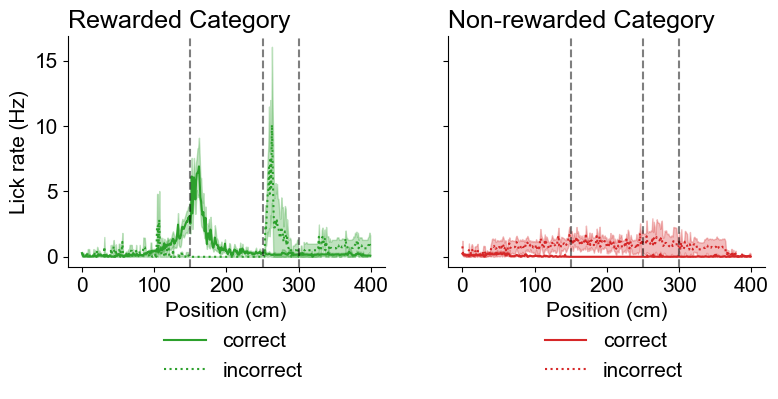

In [268]:
avg_lrate_ttype_lick = np.load("../data/overall/avg_lrate_cat_lick.npy")
plot_behav_cov(avg_lrate_ttype_lick, "Lick rate (Hz)", figsize=(9, 3))

## maybe we can model the relationship between behavioral covariates and coding direction

In [18]:
mice

[Mouse(name='VG15', datexp='2024_10_16', blk='2', data_path='Z:/data/PROC'),
 Mouse(name='VG15', datexp='2024_10_31', blk='2', data_path='Z:/data/PROC')]

In [19]:
name, date, blk = mice[1].name, mice[1].datexp, mice[1].blk
speed = np.load(f"../data/{name}/{date}/{blk}/speed_interp.npy")
motion = np.load(f"../data/{name}/{date}/{blk}/motion_energy_corridor.npy")
pupil = np.load(f"../data/{name}/{date}/{blk}/pupil_area_corridor.npy")
lick_rate = np.load(f"../data/notz/{name}/{date}/{blk}/lick_rate.npy")
delta_motion = ((np.expand_dims(motion[:,0],axis=1) - motion) / (np.expand_dims(motion[:,0],axis=1))) * 100
delta_pupil = ((np.expand_dims(pupil[:,0],axis=1) - pupil) / (np.expand_dims(pupil[:,0],axis=1))) * 100
# rewarded history
neurons, trials, positions = mice[1].interp_spks.shape
reward_history = np.zeros(trials)
category = np.zeros(trials)
category_A = np.concatenate([mice[1].trial_dict["rewarded"], mice[1].trial_dict["rewarded test"]])
correct_dict, incorrect_dict = build_correct_dicts(mice[1], lick_window=(150,250), onlytest=False)
correct_A = np.concatenate((correct_dict["rewarded"], correct_dict["rewarded test"]))
category[category_A] = 1
reward_history[correct_A] = 1
reward_history = np.roll(reward_history, 1)
reward_history[0] = 0

In [372]:
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

def bin_and_regress(observed, category, reward_hist, lick_rate, speed, pupil, motion, bin_size=50):
    n_neurons, n_trials, n_positions = observed.shape
    n_bins = n_positions // bin_size
    
    # Bin responses
    binned_responses = observed.reshape(n_neurons, n_trials, n_bins, bin_size).mean(-1)
    regressor_names = ['Intercept', 'Category', 'Reward history', 'Lick rate', 'Speed', 'Pupil', 'Motion']
    betas = np.zeros((n_neurons, n_bins, len(regressor_names)))  # intercept + 6 regressors
    
    for b in range(n_bins):
        # Mean behavioral covariates in each bin
        X = np.column_stack([
            np.ones(n_trials), #intercept
            category,
            reward_hist,
            lick_rate[:, b*bin_size:(b+1)*bin_size].mean(1),
            speed[:, b*bin_size:(b+1)*bin_size].mean(1),
            pupil[:, b*bin_size:(b+1)*bin_size].mean(1),
            motion[:, b*bin_size:(b+1)*bin_size].mean(1)
        ])
        
        for n in range(n_neurons):
            y = binned_responses[n, :, b]
            model = sm.OLS(y, X).fit()
            betas[n, b, :] = model.params
            
    return betas, regressor_names

Lets grab the neurons with high dp:

In [370]:
area_prefer_r, area_prefer_nr, selected_type, ia = select_neurons(mice[1], "medial", "exc")
medial_dp_exc = area_prefer_r + area_prefer_nr
medial_neurons = mice[1].interp_spks[medial_dp_exc, :]

In [373]:
betas_pos, names = bin_and_regress(
    observed=medial_neurons,
    category=category,
    reward_hist=reward_history,
    lick_rate=lick_rate,
    speed=speed,
    motion=delta_motion,
    pupil=delta_pupil
)

In [374]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def plot_beta_overview(betas_pos, names):
    neurons, bins, regressors = betas_pos.shape

    # Create a long-form DataFrame
    data = []
    for b in range(bins):
        for r in range(1, regressors):  # Skip intercept at index 0
            for n in range(neurons):
                data.append({
                    "Beta": betas_pos[n, b, r],
                    "Bin": f"Bin {b}",
                    "Regressor": names[r]
                })

    df = pd.DataFrame(data)

    # Create a combined identifier for (Bin, Regressor)
    df["Bin-Regressor"] = df["Bin"] + " | " + df["Regressor"]

    plt.figure(figsize=(20, 6))
    sns.violinplot(data=df, x="Bin-Regressor", y="Beta", inner="box", density_norm='width')
    #plot a horizontal line at each change of bin
    for i in range(1, len(df["Bin"].unique())):
        plt.axvline(x=i*len(df["Regressor"].unique())-.5, color='gray', linestyle='--', alpha=0.5)
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

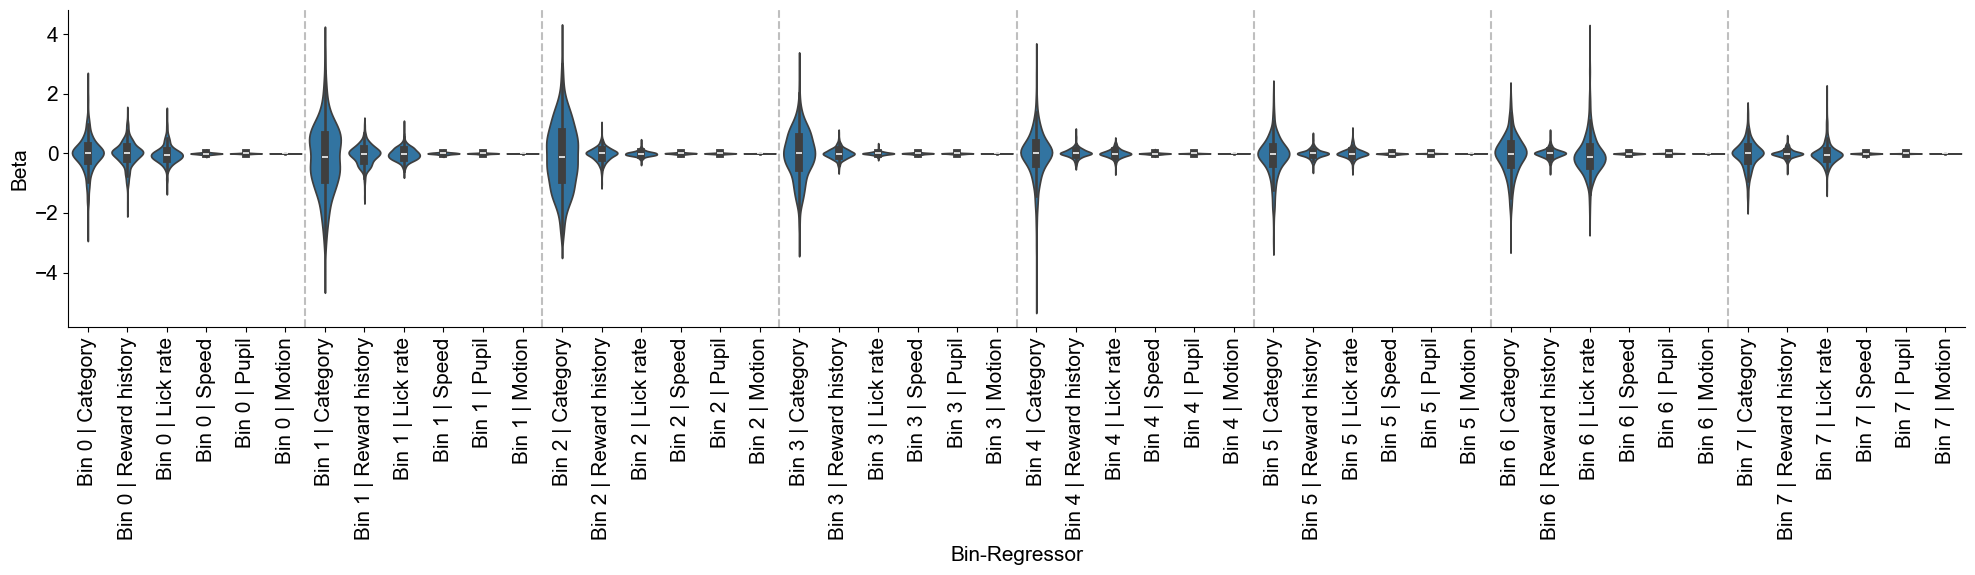

In [375]:
plot_beta_overview(betas_pos, names)

Now lets do it with the neurons with low dp:

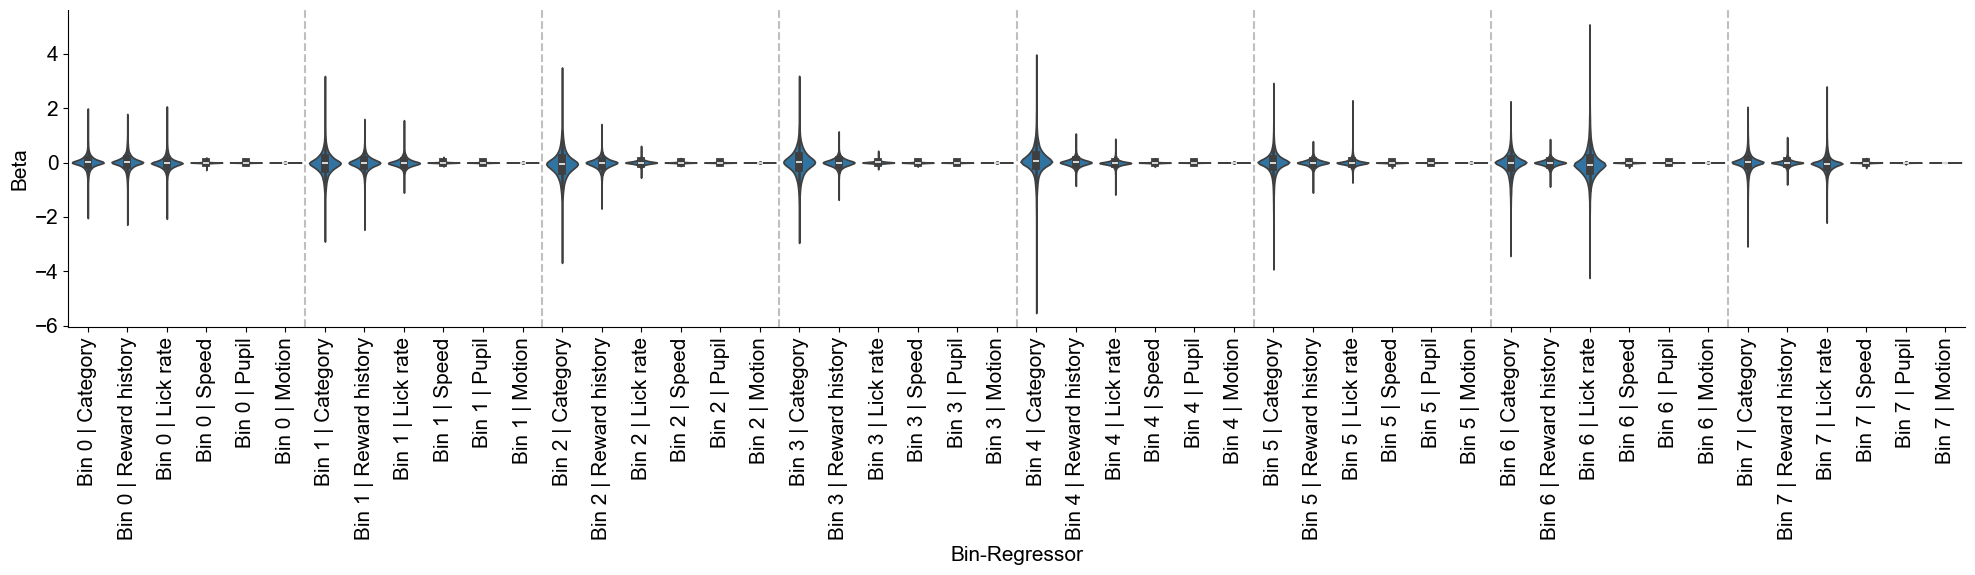

In [376]:
area_prefer_r, area_prefer_nr, selected_type, ia = select_neurons(mice[1], "medial", "exc")
medial_dp_exc = area_prefer_r + area_prefer_nr
not_dp = np.logical_not(medial_dp_exc)
medial_neurons = mice[1].interp_spks[not_dp, :]
betas_pos, names = bin_and_regress(
    observed=medial_neurons,
    category=category,
    reward_hist=reward_history,
    lick_rate=lick_rate,
    speed=speed,
    motion=delta_motion,
    pupil=delta_pupil
)
plot_beta_overview(betas_pos, names)

Behavioral covariates seem to not be related to coding direction, lets try if we can use only behavior to predict categories

In [377]:
from sklearn.metrics import roc_auc_score, accuracy_score
import matplotlib.pyplot as plt
import numpy as np

# Compute performance metrics
def compute_performance(prob, observed):
    n_bins = prob.shape[1]
    auc_scores = []
    accuracies = []
    for b in range(n_bins):
        auc = roc_auc_score(observed, prob[:, b])
        acc = accuracy_score(observed, (prob[:, b] > 0.5).astype(int))
        auc_scores.append(auc)
        accuracies.append(acc)
    return auc_scores, accuracies

# Plot performance and betas
def plot_performance_and_betas(auc_scores, accuracies, betas, names, ax):
    n_bins = len(auc_scores)
    # Plot Accuracy
    ax[0].plot(range(n_bins), accuracies, label="Accuracy", color="k")
    # fill between the reward bins
    ax[0].fill_between(range(6, 9), 0.5, 1, color='green', alpha=0.2)
    ax[0].set_ylabel("Performance")
    ax[0].set_yticks([.5, .75,  1])
    ax[0].legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    ax[0].set_title("Decoder Performance Across Bins")

    # Plot betas
    for i, name in enumerate(names):
        ax[1].plot(range(n_bins), betas[i], label=name)
    ax[1].set_ylabel("Beta Coefficients")
    ax[1].set_xlabel("Bins")
    ax[1].legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    ax[1].set_title("Change in Betas Across Bins")
    ax[1].axvline(x=5, color='gray', linestyle='--', alpha=0.5)
    # get ylim of the second plot
    y_min, y_max = ax[1].get_ylim()
    ax[1].fill_between(range(6, 9), y_min, y_max, color='green', alpha=0.2)

    plt.tight_layout()
    plt.show()

In [378]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold, StratifiedShuffleSplit
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [379]:
# data preparation
def causal_exponential_filter(x, ew=0.1):
    """Causal exponential filter with smoothing factor alpha (0 < alpha <= 1)"""
    x_filtered = np.zeros_like(x)
    x_filtered[:, 0] = x[:, 0]
    for t in range(1, x.shape[1]):
        x_filtered[:, t] = ew * x[:, t] + (1 - ew) * x_filtered[:, t - 1]
    return x_filtered

def compute_acceleration(speed, ew=.1):
    """Compute acceleration from speed using a causal exponential filter"""
    smooth_speed = causal_exponential_filter(speed, ew=ew)
    acceleration = np.diff(smooth_speed, axis=1)
    acceleration = np.pad(acceleration, ((0,0),(1, 0)), mode='edge') # pad with last value
    return acceleration

acc = compute_acceleration(speed, ew=.2)
reg_names = ['Intercept','Lick rate', 'Speed', 'Acc', 'Pupil', 'Motion']
features = [lick_rate, speed, acc, delta_pupil, delta_motion]
onlycorridor = True
if onlycorridor:
    for f in features:
        f = f[:, :300]
covariates = np.stack(features, axis=2)
print(covariates.shape, "trials, positions, features")


(399, 400, 5) trials, positions, features


In [380]:
def reg_cat_frombehav(category, covariates, bin_size=25, n_splits=10):
    n_trials, n_positions, n_features = covariates.shape
    n_bins = n_positions // bin_size
    prob = np.zeros((n_trials, n_bins))
    betas = np.zeros((n_features+1, n_bins))
    models = []

    #sss = StratifiedShuffleSplit(n_splits=n_splits, test_size=test_size, random_state=333)
    skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=333)

    for b in range(n_bins):
        # Average over bin
        bin_covs = covariates[:, b*bin_size:(b+1)*bin_size, :].mean(axis=1) 

        X_bin = bin_covs  
        y = category

        fold_probs = np.zeros(n_trials)
        fold_betas = []

        for train_idx, test_idx in skf.split(X_bin, y):
            X_train, X_test = X_bin[train_idx], X_bin[test_idx]
            y_train, y_test = y[train_idx], y[test_idx]

            pipe = Pipeline([
                ('scaler', StandardScaler()),
                ('logreg', LogisticRegression(max_iter=1000))
            ])
            pipe.fit(X_train, y_train)

            fold_probs[test_idx] = pipe.predict_proba(X_test)[:, 1]
            # Get coefficients from the pipeline
            coefs = pipe.named_steps['logreg'].coef_[0]
            intercept = pipe.named_steps['logreg'].intercept_[0]
            fold_betas.append(np.concatenate([[intercept], coefs]))
            models.append(pipe)

        prob[:, b] = fold_probs
        betas[:, b] = np.mean(fold_betas, axis=0)
        
    return models, prob, betas, 

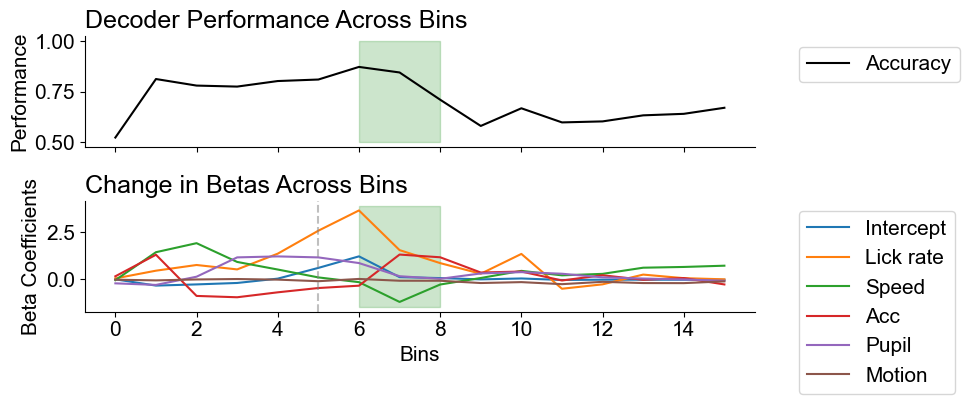

In [381]:
models, prob, betas  = reg_cat_frombehav(category, covariates, bin_size=25, n_splits=10)
auc_scores, accuracies = compute_performance(prob, category)

# Plot results
fig, ax = plt.subplots(2, 1, figsize=(10, 4), sharex=True)
plot_performance_and_betas(auc_scores, accuracies, betas, reg_names, ax)

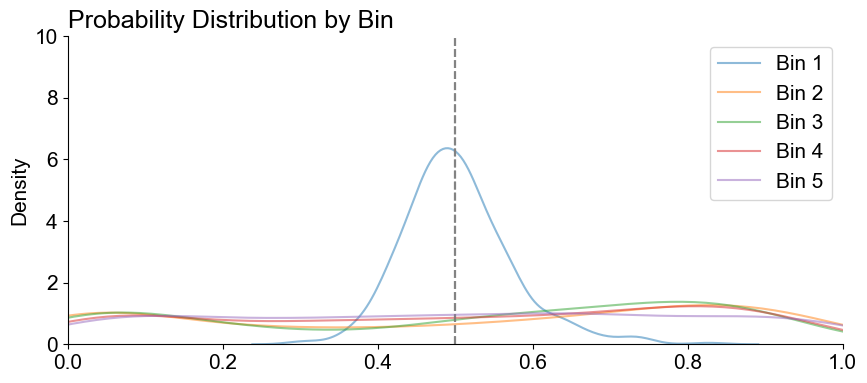

In [382]:
#plot the distribution of the probabilities by trial type and bin
fig, ax = plt.subplots(1, 1, figsize=(10, 4), sharex=True, sharey=True)
for b in range(5):
    sns.kdeplot(prob[:,b], ax=ax, label=f"Bin {b+1}", alpha=0.5)
    ax.set_ylabel("Density")
    ax.set_title("Probability Distribution by Bin")
    ax.legend()
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 10)
    ax.axvline(x=0.5, color='gray', linestyle='--', alpha=0.5)

# without spliting into correct only

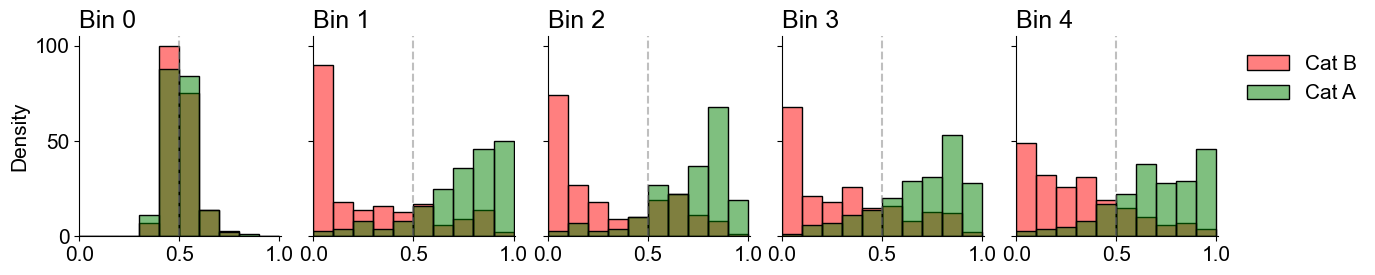

In [398]:
#plot the distribution of the probabilities by trial type and bin
fig, ax = plt.subplots(1, 5, figsize=(14, 3), sharex=True, sharey=True)
for b in range(5):
    sns.histplot(prob[category==0,b], ax=ax[b], label=f"Cat B", alpha=0.5, color='red', bins=np.arange(0, 1.1, 0.1))
    sns.histplot(prob[category==1,b], ax=ax[b], label=f"Cat A", alpha=0.5, color='green', bins=np.arange(0, 1.1, 0.1))
    ax[b].set_ylabel("Density")
    ax[b].set_title(f"Bin {b}")
    ax[b].set_xlim(0, 1.009)
    ax[b].axvline(x=0.5, color='gray', linestyle='--', alpha=0.5)
ax[-1].legend(bbox_to_anchor=(1.05, 1), loc='upper left', frameon=False)
plt.tight_layout()

In [384]:
def dprime_cell(m1, condition1, condition2, discrimination_region=(0,125), subpop=None):
    """
    Compute the d-prime for a single cell.
    """
    response = m1.interp_spks[:,:,discrimination_region[0]:discrimination_region[1]].mean(2)
    r1 = response[:, condition1]
    r2 = response[:, condition2]
    if subpop is not None:
        r1 = r1[subpop]
        r2 = r2[subpop]
    # collect means and stds
    mu1 = r1.mean(1)
    mu2 = r2.mean(1)
    std1 = r1.std(1) + np.finfo(np.float64).tiny
    std2 = r2.std(1) + np.finfo(np.float64).tiny
    #compute the train dprime
    dp = 2 * ((mu1 - mu2) / (std1 + std2))
    return dp

In [387]:
### Crossvalidation partitions ###
correct_dict, incorrect_dict = build_correct_dicts(mice[1], lick_window=(150,250), onlytest=False) #using all the trials
## Dprime selection trials
protA_train = np.intersect1d(mice[1].trial_dict["rewarded"][::2], correct_dict["rewarded"]) 
protB_train = np.intersect1d(mice[1].trial_dict["non rewarded"][::2], correct_dict["non rewarded"])
dp = dprime_cell(mice[1], protA_train, protB_train, discrimination_region=(0,125))
## test trials
correct_rew = np.intersect1d(mice[1].trial_dict["rewarded"][1::2], correct_dict["rewarded"])
correct_nrew = np.intersect1d(mice[1].trial_dict["non rewarded"][1::2], correct_dict["non rewarded"])
correct_rewtest = np.intersect1d(mice[1].trial_dict["rewarded test"], correct_dict["rewarded test"])
correct_nrewtest = np.intersect1d(mice[1].trial_dict["non rewarded test"], correct_dict["non rewarded test"])

In [388]:
correct_A = np.concatenate((correct_rew, correct_rewtest))
correct_B = np.concatenate((correct_nrew, correct_nrewtest))
print(correct_A.shape, correct_B.shape)

(142,) (125,)


After splitting to correct only

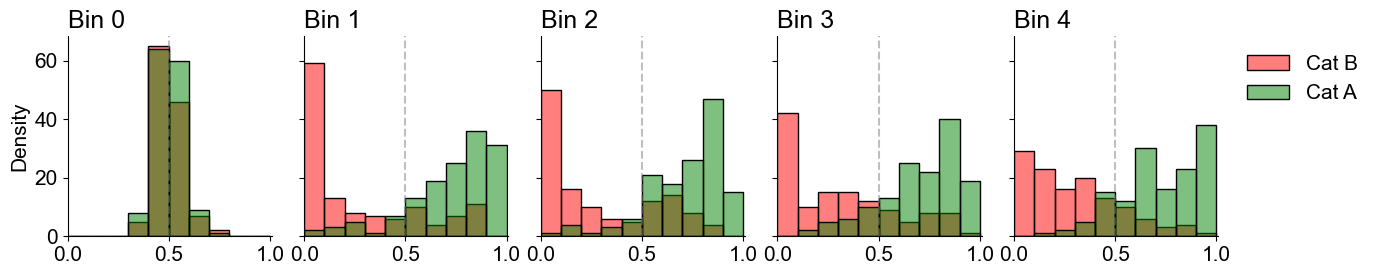

In [397]:
fig, ax = plt.subplots(1, 5, figsize=(14, 3), sharex=True, sharey=True)
for b in range(5):
    sns.histplot(prob[correct_B,b], ax=ax[b], label=f"Cat B", alpha=0.5, color='red', bins=np.arange(0, 1.1, 0.1))
    sns.histplot(prob[correct_A,b], ax=ax[b], label=f"Cat A", alpha=0.5, color='green', bins=np.arange(0, 1.1, 0.1))
    ax[b].set_ylabel("Density")
    ax[b].set_title(f"Bin {b}")
    ax[b].set_xlim(0, 1.009)
    ax[b].axvline(x=0.5, color='gray', linestyle='--', alpha=0.5)
ax[-1].legend(bbox_to_anchor=(1.05, 1), loc='upper left', frameon=False)
plt.tight_layout()

In [429]:
p_bins = np.digitize(prob[:,4], bins=np.arange(0, 1.1, 0.1)) - 1
cat_a = np.unique(p_bins[correct_A], return_counts=True)
cat_b = np.unique(p_bins[correct_B], return_counts=True)
matched_trials = []
n_matched = []
#lets look only for behavior ambiguous trials bin 3-6
for b in range(3,7):
    a_trials = cat_a[1][b]
    b_trials = cat_b[1][b]
    m_trials = min(a_trials, b_trials)
    n_matched.append(m_trials)
# now we can get the trials for each bin
    a_trials = np.where(p_bins[correct_A] == b)[0][:m_trials]
    b_trials = np.where(p_bins[correct_B] == b)[0][:m_trials]
    matched_trials.append((a_trials, b_trials))
matched_trials = np.array(matched_trials, dtype=object)
matched_trials


array([[array([  3,  40,  44, 100, 108], dtype=int64),
        array([  2,  22,  40,  55,  57,  75,  76,  83,  84,  86,  89,  90,  97,
                99, 102], dtype=int64)                                         ],
       [array([  0,  17,  21,  27,  33,  47,  51,  67,  79,  98, 115, 117],
              dtype=int64)                                                 ,
        array([24, 26, 32, 44, 45, 46, 63, 64, 70, 72, 81, 98], dtype=int64)],
       [array([ 1, 23, 53, 55, 58, 62, 86, 87, 92, 95], dtype=int64),
        array([ 13,  17,  65,  82,  93, 111, 120, 122, 123, 124], dtype=int64)],
       [array([ 2,  5,  6, 11, 12, 13], dtype=int64),
        array([ 4, 10, 11, 62, 88, 94], dtype=int64)]], dtype=object)

In [453]:
a_prefer, b_prefer, c_type, area = select_neurons(mice[1], "lateral", "exc", dprime=dp)
cd = mice[1].interp_spks[a_prefer].mean(0) - mice[1].interp_spks[b_prefer].mean(0)

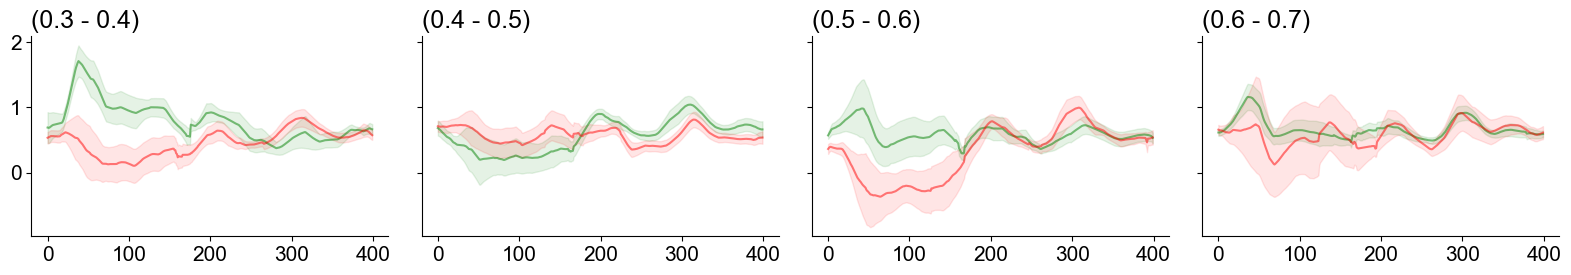

In [454]:
#plot the responses of the neurons in the matched trials per bin
fig, ax = plt.subplots(1, matched_trials.shape[0], figsize=(16, 3), sharex=True, sharey=True)
probs_bins = [(.3, .4), (.4, .5), (.5, .6), (.6, .7)]
for b in range(matched_trials.shape[0]):
    a_trials, b_trials = matched_trials[b]
    a_cd = cd[a_trials, :].mean(axis=0)
    b_cd = cd[b_trials, :].mean(axis=0)
    a_cd_sem = sem(cd[a_trials, :], axis=0)
    b_cd_sem = sem(cd[b_trials, :], axis=0)
    ax[b].plot(a_cd, color='green', alpha=0.5)
    ax[b].fill_between(np.arange(400), a_cd-a_cd_sem, a_cd+a_cd_sem, alpha=0.1, color='green')
    ax[b].plot(b_cd, color='red', alpha=0.5)
    ax[b].fill_between(np.arange(400), b_cd-b_cd_sem, b_cd+b_cd_sem, alpha=0.1, color='red')
    ax[b].set_title(f"({probs_bins[b][0]} - {probs_bins[b][1]})")
plt.tight_layout()

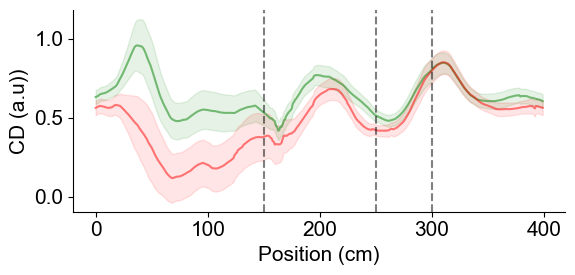

In [455]:
A_plot_t = np.concatenate(matched_trials[:,0])
B_plot_t = np.concatenate(matched_trials[:,1])
A_plot = cd[A_plot_t, :].mean(axis=0)
B_plot = cd[B_plot_t, :].mean(axis=0)
A_plot_sem = sem(cd[A_plot_t, :], axis=0)
B_plot_sem = sem(cd[B_plot_t, :], axis=0)
fig, ax = plt.subplots(1, 1, figsize=(6, 3))
ax.plot(A_plot, color='green', alpha=0.5)
ax.fill_between(np.arange(400), A_plot-A_plot_sem, A_plot+A_plot_sem, alpha=0.1, color='green')
ax.plot(B_plot, color='red', alpha=0.5)
ax.fill_between(np.arange(400), B_plot-B_plot_sem, B_plot+B_plot_sem, alpha=0.1, color='red')
ax.set_ylabel("CD (a.u))")
ax.set_xlabel("Position (cm)")
ax.axvline(150, color='k', linestyle='--', alpha=0.5)
ax.axvline(250, color='k', linestyle='--', alpha=0.5)   
ax.axvline(300, color='k', linestyle='--', alpha=0.5)
plt.tight_layout()

### lets grap up everything in a tidy way:

In [463]:
def match_trials_behav(behavior_prob, pbin, cond1, cond2):
    """ 
    matches trials from two conditions based on behavior ambiguity.
    behavior_prob: probability based on behavior of a trials being cat A
    cond1: trials from condition 1
    cond2: trials from condition 2
    """
    p_bins = np.digitize(behavior_prob[:,pbin], bins=np.arange(0, 1.1, 0.1)) - 1
    cat_a = np.unique(p_bins[cond1], return_counts=True)
    cat_b = np.unique(p_bins[cond1], return_counts=True)
    matched_trials = []
    n_matched = []
    #lets look only for behavior ambiguous trials bin 3-6
    for b in range(3,7):
        a_trials = cat_a[1][b]
        b_trials = cat_b[1][b]
        m_trials = min(a_trials, b_trials)
        n_matched.append(m_trials)
    # now we can get the trials for each bin
        a_trials = np.where(p_bins[cond1] == b)[0][:m_trials]
        b_trials = np.where(p_bins[cond2] == b)[0][:m_trials]
        matched_trials.append((a_trials, b_trials))
    matched_trials = np.array(matched_trials, dtype=object)
    return matched_trials

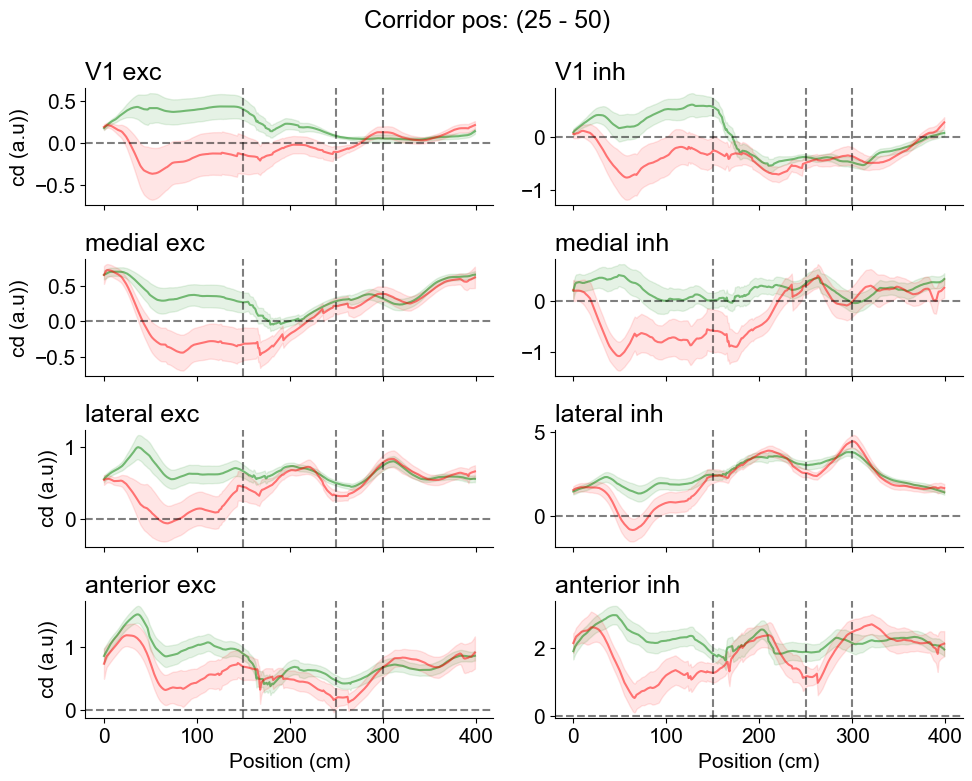

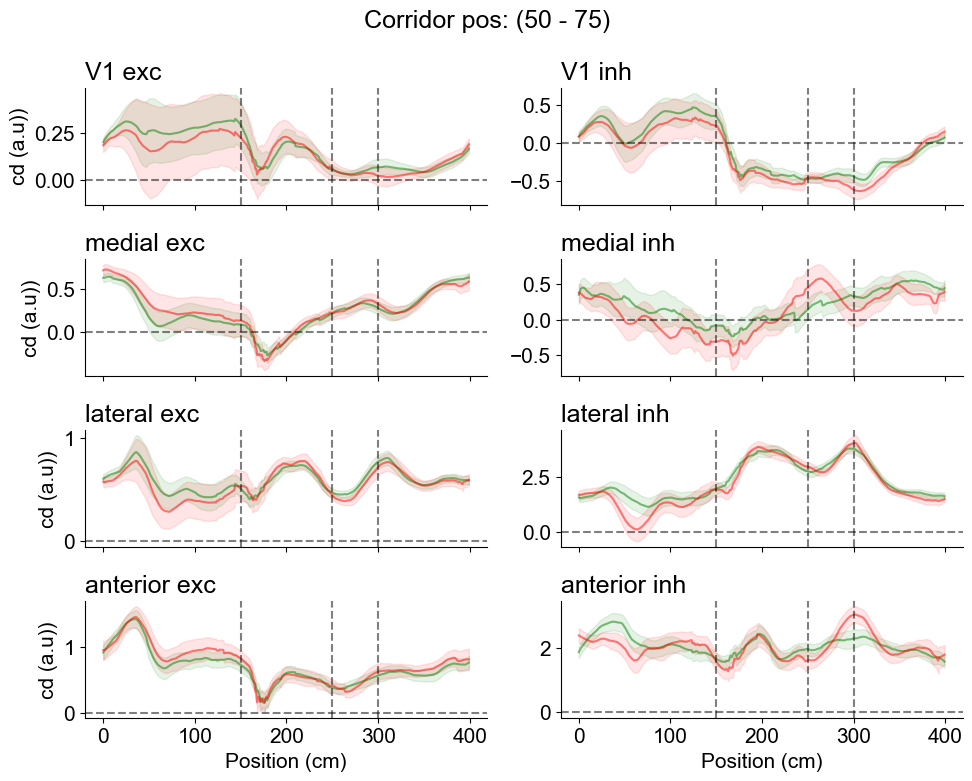

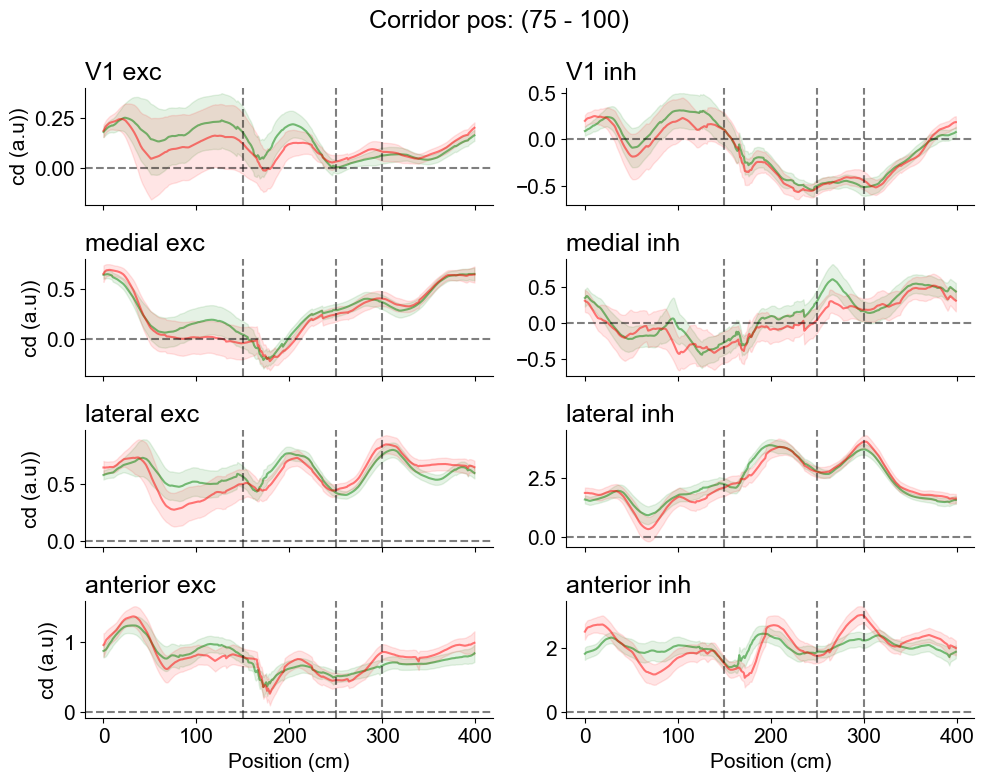

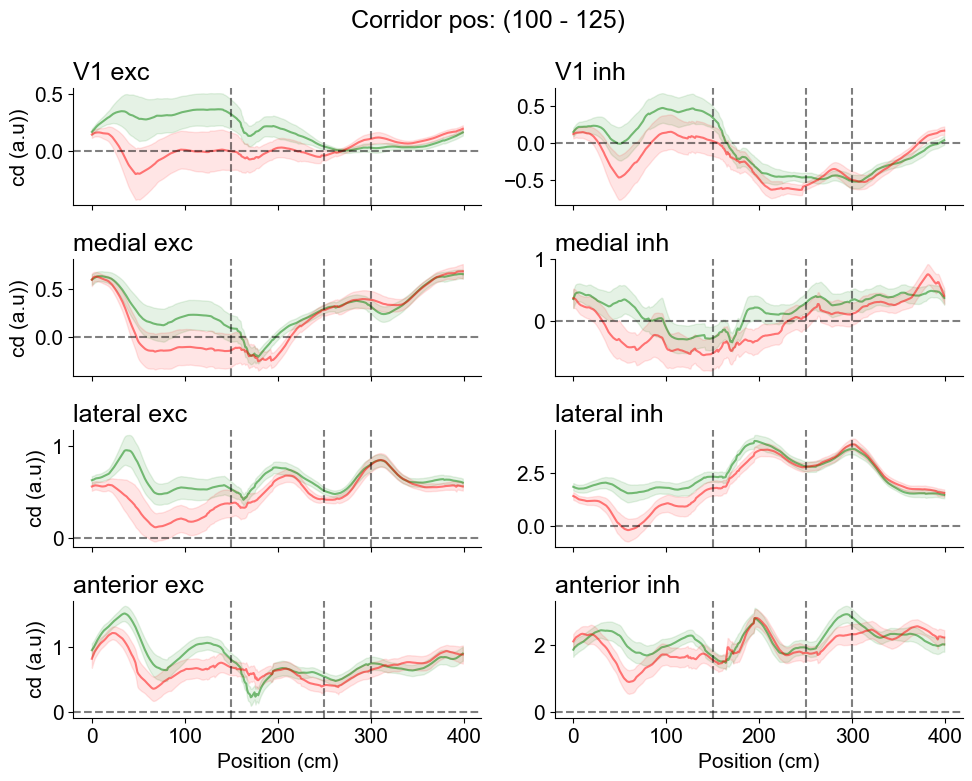

In [469]:
### Crossvalidation partitions ###
correct_dict, incorrect_dict = build_correct_dicts(mice[1], lick_window=(150,250), onlytest=False) #using all the trials
## Dprime selection trials
protA_train = np.intersect1d(mice[1].trial_dict["rewarded"][::2], correct_dict["rewarded"]) 
protB_train = np.intersect1d(mice[1].trial_dict["non rewarded"][::2], correct_dict["non rewarded"])
dp = dprime_cell(mice[1], protA_train, protB_train, discrimination_region=(0,125))
## test trials
correct_rew = np.intersect1d(mice[1].trial_dict["rewarded"][1::2], correct_dict["rewarded"])
correct_nrew = np.intersect1d(mice[1].trial_dict["non rewarded"][1::2], correct_dict["non rewarded"])
correct_rewtest = np.intersect1d(mice[1].trial_dict["rewarded test"], correct_dict["rewarded test"])
correct_nrewtest = np.intersect1d(mice[1].trial_dict["non rewarded test"], correct_dict["non rewarded test"])
correct_A = np.concatenate((correct_rew, correct_rewtest))
correct_B = np.concatenate((correct_nrew, correct_nrewtest))
corridor_bins = [(25, 50), (50, 75), (75, 100), (100, 125)]
for cbin in range(1,5):
    matched_trials = match_trials_behav(prob, cbin, correct_A, correct_B)
    fig, ax = plt.subplots(4, 2, figsize=(10, 8), sharex=True)
    fig.suptitle(f"Corridor pos: ({corridor_bins[cbin-1][0]} - {corridor_bins[cbin-1][1]})")
    for i_a, area in enumerate(["V1", "medial", "lateral", "anterior"]):
        ax[i_a, 0].set_ylabel("cd (a.u))")
        for ct, c_type in enumerate(["exc", "inh"]):
            a_prefer, b_prefer, _ , _ = select_neurons(mice[1], area, c_type, dprime=dp)
            cd = mice[1].interp_spks[a_prefer].mean(0) - mice[1].interp_spks[b_prefer].mean(0)
            A_plot_t = np.concatenate(matched_trials[:,0])
            B_plot_t = np.concatenate(matched_trials[:,1])
            A_plot = cd[A_plot_t, :].mean(axis=0)
            B_plot = cd[B_plot_t, :].mean(axis=0)
            A_plot_sem = sem(cd[A_plot_t, :], axis=0)
            B_plot_sem = sem(cd[B_plot_t, :], axis=0)
            ax[i_a, ct].plot(A_plot, color='green', alpha=0.5)
            ax[i_a, ct].fill_between(np.arange(400), A_plot-A_plot_sem, A_plot+A_plot_sem, alpha=0.1, color='green')
            ax[i_a, ct].plot(B_plot, color='red', alpha=0.5)
            ax[i_a, ct].fill_between(np.arange(400), B_plot-B_plot_sem, B_plot+B_plot_sem, alpha=0.1, color='red')
            ax[i_a, ct].axvline(150, color='k', linestyle='--', alpha=0.5)
            ax[i_a, ct].axvline(250, color='k', linestyle='--', alpha=0.5)
            ax[i_a, ct].axvline(300, color='k', linestyle='--', alpha=0.5)
            ax[i_a, ct].axhline(0, color='k', linestyle='--', alpha=0.5)
            ax[i_a, ct].set_title(f"{area} {c_type}")
            if i_a == 3:
                ax[i_a, ct].set_xlabel("Position (cm)")
    plt.tight_layout()
